<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/Busqueda_errores_graficar_carpeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Búsqueda masiva de errores en archivos de datos de una o varias carpetas
Jose Luis López Elvira ([enlace a más recursos en GitHub](https://github.com/joselvira/BiomecanicaPython))

Última modificación 22/05/2025

En el proceso de análisis de datos dentro de la investigación, tras haber recolectado los datos y antes de meternos en aplicar los procedimientos de análisis que correspondan, el primer paso que debemos dar es **visualizar los datos** en busca de posibles errores. Por muy cuidadosos que hayamos sido a la hora de registrar los datos y aplicar los protocolos de medición, es muy frecuente que se nos cuelen archivos con algún tipo de **error o impureza**, que de no ser detectado y corregido puede afectar a los resultados de la investigación. Por ejemplo, si estamos analizando datos de fuerza vertical en saltos en caída, lo normal es que los datos empiecen con fuerzas de 0 N antes de recibir el impacto del saltador. Sin embargo puede pasar que en algunos archivos las fuerzas empiezan con valores muy distintos de esos 0 N, seguramente por un error en el protocolo del ajuste de cero de la plataforma, y esos archivos habría que eliminarlos o corregirlos. Es cierto que este ejemplo tan sencillo se podría verificar de forma automática, pero en otros casos con datos más complejos sería más sencillo detectar los errores mediante la inspección visual de las gráficas.

Por eso mismo resulta **IMPRESCINDIBLE** antes de realizar cualquier tratamiento de los datos aplicar el procedimiento de revisión que se irá explicando a continuación.

El objetivo consiste en realizar gráficas de las variables que nos interesen de los archivos registrados (con cualquier instrumento de medición) en busca de errores que podamos detectar visualmente. El objetivo final será crear un archivo en *pdf* con todas las gráficas de la carpeta. Al tener todas las gráficas en un mismo archivo, podemos fácilmente revisar en conjunto todas las gráficas de forma sencilla y rápida. Como segunda ventaja, dejamos constancia de lo que hemos hecho,  lo que mejora la **trazabilidad y reproducibilidad de la investigación**. Es fácil que después de un tiempo tengamos que retomar la investigación y no nos acordemos de cosas que en su día teníamos muy claras, pero que con el tiempo se olvidan.

En primer lugar, cargamos las librerías que vamos a utilizar y preparamos para poder acceder a los archivos de nuestro *Drive*.

In [ ]:
import os
from pathlib import Path #para gestión de archivos y carpetas
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages #para guardar gráficas en pdf
import time #para cuantificar tiempos de procesado

# Lo siguiente muestra un enlace para que otorguemos permiso para acceder a nuestro Drive
drive.mount('/googledrive', force_remount=True)

Mounted at /googledrive


Para poder seguir bien los ejemplos ejecutando las celdas de código, tendrás que descargarte los archivos que utilizaremos.
Como ejemplo, vamos a ver los datos de los **registros de saltos medidos con una plataforma de fuerzas**. Estos archivos puedes encontrarlos en la carpeta [Datos/PlatFuerzas/Saltos/](https://github.com/joselvira/BiomecanicaPython/tree/master/Datos/PlatFuerzas/Saltos) del repositorio de GitHub [BiomecanicaPython](https://github.com/joselvira/BiomecanicaPython). Guárdalos en una carpeta de tu *Google Drive*. En los ejemplos de este notebook los tengo guardados en la ruta *Mi unidad/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos*. Si los guardas en otra ruta, simplemente tendrás que modificar la instrucción donde te indicaré más adelante.

Empezaremos cargando un solo archivo para configurar las gráficas que queremos, y después haremos el mismo proceso con cada archivo.
Por cierto, en el notebook [Lectura_escritura_archivos_carpetas](https://github.com/joselvira/BiomecanicaPython/blob/master/Notebooks/Lectura_escritura_archivos_carpetas.ipynb) se encuentran ejemplos de las instrucciones para cargar los datos de los archivos de distintos instrumentos de medida habituales en Ciencias del Deporte, especialmente en Biomecánica. Esto te servirá para adaptar los ejemplos a tus propios archivos.

## Cargar los datos
Empezamos por abrir y cargar en memoria un archivo de datos cualquiera. Sobre esos datos configuraremos una gráfica básica que después reproduciremos con los datos de todos los archivos.

En la variable *ruta_trabajo* se guarda la ruta donde se encuentran los archivos que vamos a utilizar. Aquí es donde deberías adaptar a la ruta del *Drive* donde hayas descargado los archivos de fuerzas de ejemplo. Si por ejemplo los has descargado en una carpeta llada *Archivos salto* que se encuentra en el directorio raíz del *Drive*, tendrías que poner esta línea de código:

ruta_trabajo = Path('/googledrive/My Drive/Archivos salto')

In [ ]:
ruta_trabajo = Path('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos') #adapta la ruta a tus necesidades
nombre_archivo = ruta_trabajo / 'BiowareSaltos-1.txt' #este es el nombre de uno de los archivos de la carpeta

Datos = pd.read_csv(nombre_archivo, header=17, skiprows=[18], sep='\t')

Datos

abs time (s)        Fx        Fy          Fz
0            0.000  1.340692 -1.545765  701.964775
1            0.001  1.580361 -1.266329  703.393150
2            0.002  1.380490 -1.426170  701.648857
3            0.003  1.340692 -1.625571  702.282661
4            0.004  1.460380 -1.426170  702.283669
...            ...       ...       ...         ...
7995         7.995  7.693244 -4.482145  708.699646
7996         7.996  7.853317 -4.362091  708.858414
7997         7.997  8.092987 -4.242496  709.968094
7998         7.998  8.013097 -4.362091  710.919220
7999         7.999  7.733335 -4.641298  706.640640

[8000 rows x 4 columns]

Imaginemos que nos interesa analizar la fuerza vertical (Fz). Vamos a realizar una gráfica de la columna que incluye esta variable. De forma rápida podemos hacerlo con esta instrucción:

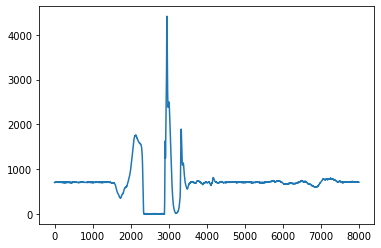

In [ ]:
plt.plot(Datos['Fz'])

Ahora vamos a darle un poco de formato. Por ejemplo, queremos que en el eje horizontal se muestre la escala de tiempo del salto. Esta variable se encuentra en la primera columna del archivo (la variable se llama *abs time (s)*). También queremos controlar el tamaño de la figura, así que vamos a meterlo todo en una estructura de figura de *matplotlib*.

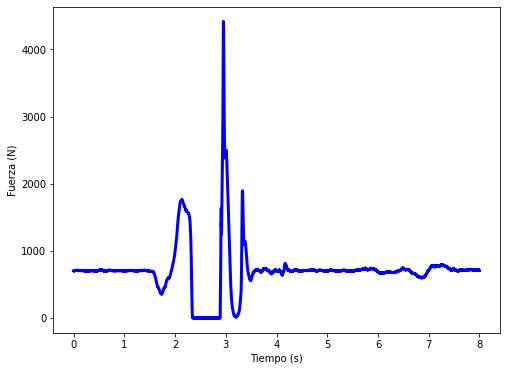

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3)
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Fuerza (N)')
plt.show()

También nos va a venir bien ponerle un título con el nombre del archivo al que corresponde, porque después tendremos una gráfica para cada archivo. El nombre el archivo lo podemos sacar a partir de la ruta completa de la variable nombreArchivo con ayuda de la librería Path.

In [ ]:
nombre_archivo.stem


'BiowareSaltos-1'

Y ahora lo ponemos como título del gráfico.

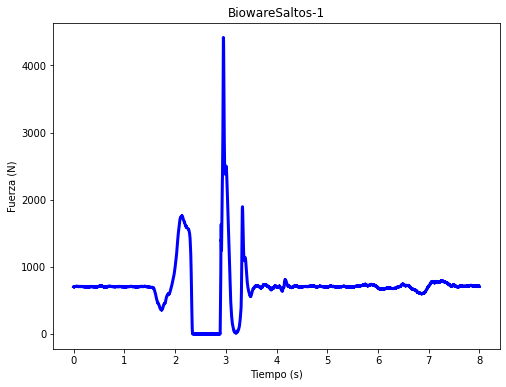

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3)
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Fuerza (N)')
ax.set_title(nombre_archivo.stem)
plt.show()

Imaginemos que también queremos añadir una línea con el peso del sujeto. El peso lo podemos medir en la primera parte del registro. En principio podemos asumir que hay un número de datos al inicio en los que la persona está quieta y la fuerza representa su peso.

Por cierto, en el notebook [Analisis_salto_vertical_Fuerzas](https://github.com/joselvira/BiomecanicaPython/blob/master/Notebooks/Analisis_salto_vertical_Fuerzas.ipynb) puedes encontrar más información sobre cómo analizar archivos de fuerzas en test de saltos.

In [ ]:
peso=Datos['Fz'][100:600].mean()
peso

703.7735102560001

Añadimos una línea horizontal con valor en el eje *y* del propio peso.

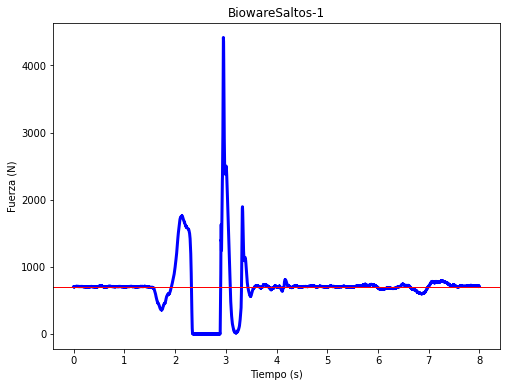

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3)
ax.axhline(y=peso, lw=1, color='r') #marca la línea del peso
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Fuerza (N)')
ax.set_title(nombre_archivo.stem)
plt.show()

Ahora no haría falta, porque con una sola gráfica se puede comprobar a ojo, pero para asegurarnos de que estamos midiendo el promedio del peso en una zona estable, mostramos un rectángulo en la ventana donde hemos calculado el promedio del peso.

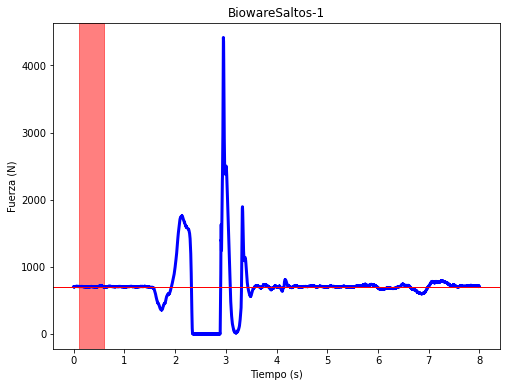

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3)
ax.axhline(y=peso, lw=1, color='r') #marca la línea del peso
ax.axvspan(Datos['abs time (s)'][100], Datos['abs time (s)'][600], alpha=0.5, color='r') #destaca en rojo el área donde se calcula el promedio del peso
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Fuerza (N)')
ax.set_title(nombre_archivo.stem)
plt.show()

Y para rematar, le ponemos etiquetas con una leyenda.
### Gráfica completa

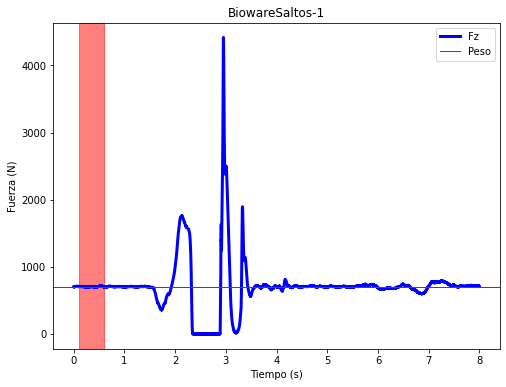

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3, label='Fz')
ax.axhline(y=peso, lw=1, color='r',label='Peso') #marca la línea del peso
ax.axvspan(Datos['abs time (s)'][100], Datos['abs time (s)'][600], alpha=0.5, color='r') #destaca en rojo el área donde se calcula el promedio del peso
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Fuerza (N)')
ax.set_title(nombre_archivo.stem)
plt.legend()
plt.show()

Ahora se trata de hacer lo mismo pero con todos los archivos de la carpeta.
## Reproducir la figura en todos los archivos
Necesitamos crear una variable que guarde todos los nombres con sus rutas de los archivos de la carpeta. Existe una función que permite hacerlo y almacenar las rutas en una lista.

In [ ]:
separador = '\t'

lista_archivos = list(ruta_trabajo.glob('**/*.txt')) #crea una lista con todos los archivos de la carpeta y subcarpetas
lista_archivos.sort() #ordena alfabéticamente los archivos encontrados
lista_archivos

[PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-1.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-2.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-3.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-4.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-5.5-Erroneo.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-5.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-6-problema.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-6.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos/BiowareSaltos-7.txt'),


Lo siguiente es crear un bucle *for* que vaya cogiendo cada archivo de la lista y vaya creando sus gráficas. Para mantenerlo todo más organizado, seguiremos una estructura separando por bloques con comentarios cada parte del proceso. Esto nos facilitará encontrar cada cosa. Podemos seguir una estructura como la siguiente, y a partir de ella ir incluyendo instrucciones.

Primero probamos que funciona el bucle simplemente imprimiendo el nombre y número de orden de cada archivo.

In [ ]:
print ("A procesar {0:d} archivos".format(len(lista_archivos)))

num_procesados=0 #contador de los archivos que va procesando
for nombre_archivo in lista_archivos[:]:
  print('Procesando archivo num {0:d} {1:s}'.format(num_procesados+1, nombre_archivo.stem))

  # =============================================================================
  # Lee los datos
  # =============================================================================


  # =============================================================================
  # Procesa los datos
  # =============================================================================


  # =============================================================================
  # Crea gráficas
  # =============================================================================


  #Finaliza procesado del archivo
  num_procesados+=1

A procesar 10 archivos
Procesando archivo num 1 BiowareSaltos-1
Procesando archivo num 2 BiowareSaltos-2
Procesando archivo num 3 BiowareSaltos-3
Procesando archivo num 4 BiowareSaltos-4
Procesando archivo num 5 BiowareSaltos-5.5-Erroneo
Procesando archivo num 6 BiowareSaltos-5
Procesando archivo num 7 BiowareSaltos-6-problema
Procesando archivo num 8 BiowareSaltos-6
Procesando archivo num 9 BiowareSaltos-7
Procesando archivo num 10 BiowareSaltos-DJ


Ahora vamos a incluir en el bucle el código que teníamos para cargar el archivo y crear su gráfica.

Para ir probando si funciona antes de ponerlo a trabajar con toda la lista de archivos, es conveniente no realizar el bucle completo desde el principio hasta el final, por si hemos cometido algún error. Empezamos pasando solo un par de archivos al bucle para probar. En la variable de la lista añadir **[:2]**, con eso pasará los dos primeros elementos de la lista.

A procesar 10 archivos
Procesando archivo num 1 BiowareSaltos-1


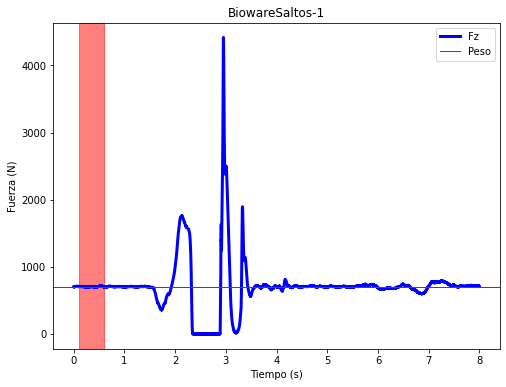

Procesando archivo num 2 BiowareSaltos-2


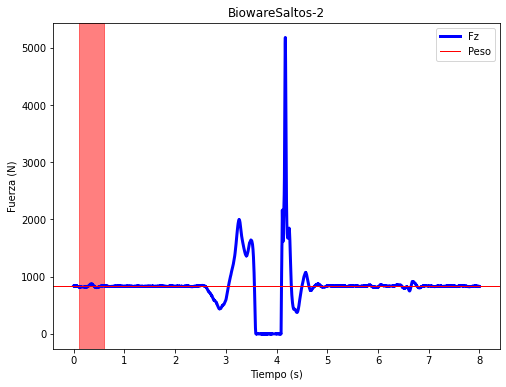


Procesados 2 de 10 archivos en la carpeta


In [ ]:
print ("A procesar {0:d} archivos".format(len(lista_archivos)))

num_procesados=0 #contador de los archivos que va procesando
for nombre_archivo in lista_archivos[:2]:
  print('Procesando archivo num {0:d} {1:s}'.format(num_procesados+1, nombre_archivo.stem))

  # =============================================================================
  # Lee los datos
  # =============================================================================
  Datos = pd.read_csv(nombre_archivo, header=17, skiprows=[18], sep=separador)

  # =============================================================================
  # Procesa los datos
  # =============================================================================
  peso=Datos['Fz'][100:600].mean()

  # =============================================================================
  # Crea gráficas
  # =============================================================================
  fig, ax = plt.subplots(figsize=(8,6))
  plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3, label='Fz')
  ax.axhline(y=peso, lw=1, color='r',label='Peso') #marca la línea del peso
  ax.axvspan(Datos['abs time (s)'][100], Datos['abs time (s)'][600], alpha=0.5, color='r') #destaca en rojo el área donde se calcula el promedio del peso
  ax.set_xlabel('Tiempo (s)')
  ax.set_ylabel('Fuerza (N)')
  ax.set_title(nombre_archivo.stem)
  plt.legend()
  plt.show()

  #Finaliza procesado del archivo
  num_procesados+=1

#ya ha terminado de procesar todos los archivos
print('\nProcesados {0:d} de {1:d} archivos en la carpeta'.format(num_procesados, len(lista_archivos)))


Como parece que va bien, podemos procesar todos los archivos incluyendo todos los elementos de la variable *lista_archivos*.

En algunas ocasiones **puede haber archivos que fallan** por algún motivo (porque falta alguna columna, está mal registrado, etc.) y dan un error que hace que se pare todo el bucle.

Vamos a incluir una medida de seguridad al abrir los archivos para que si se produce algún fallo, nos avise de que ha habido algún problema y guarde el nombre del archivo erróneo en una lista. Así, seguirá procesando los demás archivos hasta el final sin detenerse tras el error. Esto se hace con las instruccione *try* y *except*. Al final, ya fuera del bucle *for*, ponemos un apartado para que indique qué archivos han fallado.

También puede interesar **controlar el tiempo que dedica **a procesar cada archivo, el tiempo total, etc. Se gestiona con la librería *time*. La instrucción *time.time()* nos permite conocer el isntante en el que se llama a la función. Podemos guardar el tiempo cuando empieza el buce y al final, y al restarlos obtenemos el tiempo que ha dedicado a tratar cada archivo. Lo incorporamos entre el código.

## Con vigilacia de errores de lectura de archivos

A procesar 10 archivos
Procesando archivo num 1 BiowareSaltos-1


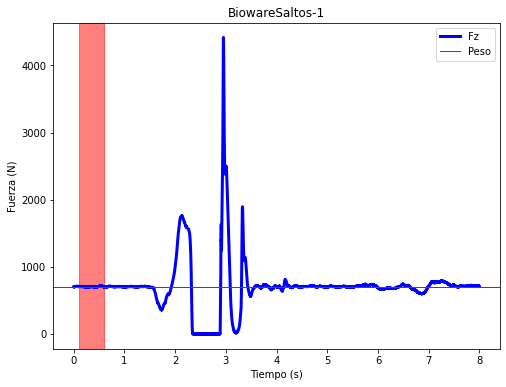

Tiempo de procesado archivo 0.342 s 

Procesando archivo num 2 BiowareSaltos-2


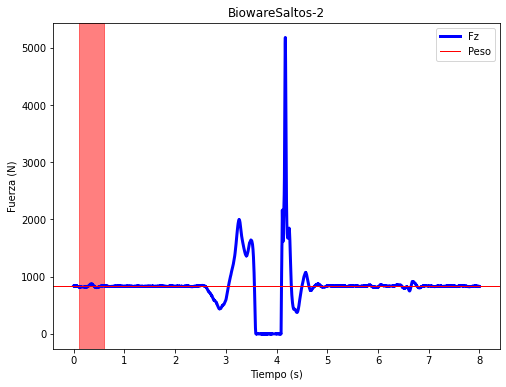

Tiempo de procesado archivo 0.357 s 

Procesando archivo num 3 BiowareSaltos-3


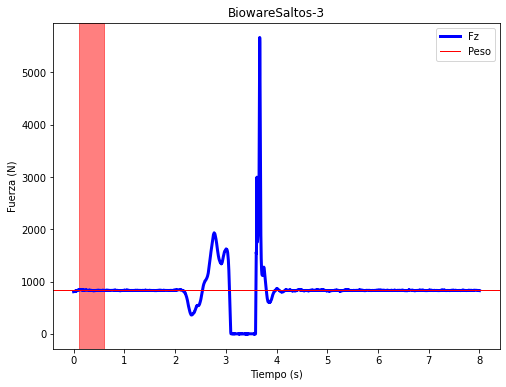

Tiempo de procesado archivo 0.622 s 

Procesando archivo num 4 BiowareSaltos-4


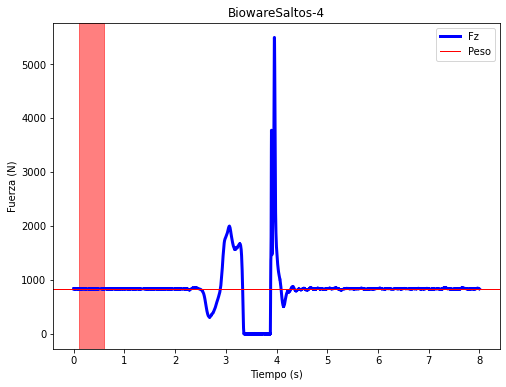

Tiempo de procesado archivo 0.699 s 


ATENCIÓN, no se ha podido procesar BiowareSaltos-5.5-Erroneo Passed header=17 but only 3 lines in file


Procesando archivo num 5 BiowareSaltos-5


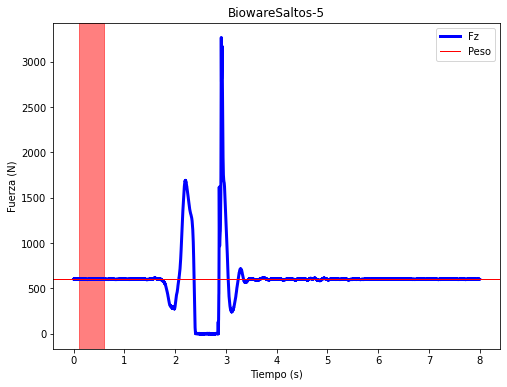

Tiempo de procesado archivo 0.583 s 

Procesando archivo num 6 BiowareSaltos-6-problema


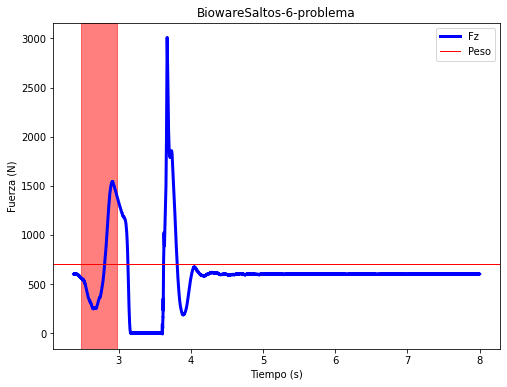

Tiempo de procesado archivo 0.566 s 

Procesando archivo num 7 BiowareSaltos-6


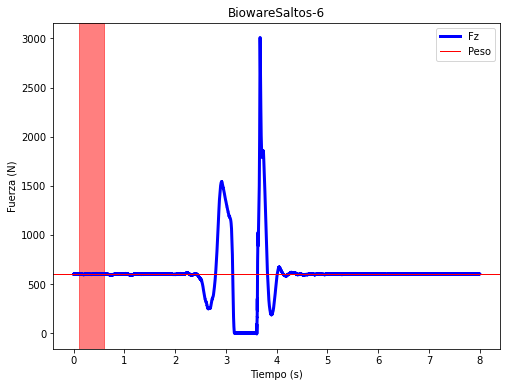

Tiempo de procesado archivo 0.601 s 

Procesando archivo num 8 BiowareSaltos-7


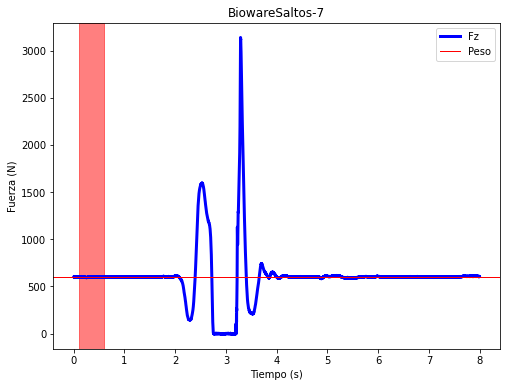

Tiempo de procesado archivo 0.543 s 

Procesando archivo num 9 BiowareSaltos-DJ


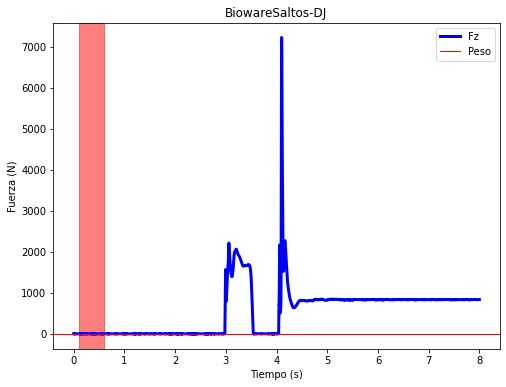

Tiempo de procesado archivo 0.566 s 


Procesados 9 de 10 archivos en la carpeta
Tiempo total 5.248 s

No se ha podido procesar:
BiowareSaltos-5.5-Erroneo Passed header=17 but only 3 lines in file


In [ ]:
print ("A procesar {0:d} archivos".format(len(lista_archivos)))

tpo_total = time.time() #para cuantificar cuánto tarda en procesar todo

num_procesados=0 #contador de los archivos que va procesando
errores_archivos=[] #guarda los nombres de archivo que no se pueden abrir y su error

for nombre_archivo in lista_archivos[:]:
  tpo_archivo = time.time() #inicia el contador de tiempo de cada archivo

  # =============================================================================
  # Lee los datos
  # =============================================================================
  try:
      Datos = pd.read_csv(nombre_archivo, header=17, skiprows=[18], sep=separador)
  except Exception as err: #Si falla anota un error y continua
      print('\nATENCIÓN, no se ha podido procesar '+ nombre_archivo.stem, err)
      errores_archivos.append(nombre_archivo.stem+' '+ str(err))
      print('\n')
      continue #si ha encontrado un error, salta a la siguiente iteración del bucle for

  print('Procesando archivo num {0:d} {1:s}'.format(num_procesados+1, nombre_archivo.stem))

  # =============================================================================
  # Procesa los datos
  # =============================================================================
  peso=Datos['Fz'][100:600].mean()

  # =============================================================================
  # Crea gráficas
  # =============================================================================
  fig, ax = plt.subplots(figsize=(8,6))
  plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3, label='Fz')
  ax.axhline(y=peso, lw=1, color='r',label='Peso') #marca la línea del peso
  ax.axvspan(Datos['abs time (s)'][100], Datos['abs time (s)'][600], alpha=0.5, color='r') #destaca en rojo el área donde se calcula el promedio del peso
  ax.set_xlabel('Tiempo (s)')
  ax.set_ylabel('Fuerza (N)')
  ax.set_title(nombre_archivo.stem)
  plt.legend()
  plt.show()

  #Finaliza procesado del archivo
  print('Tiempo de procesado archivo {0:.3f} s \n'.format(time.time()-tpo_archivo))
  num_procesados+=1

#Ya ha terminado de procesar todos los archivos
print('\nProcesados {0:d} de {1:d} archivos en la carpeta'.format(num_procesados, len(lista_archivos)))
print('Tiempo total {0:.3f} s'.format(time.time()-tpo_total))

#Si no ha podido cargar algún archivo, lo indica
if len(errores_archivos)>0:
    print('\nNo se ha podido procesar:')
    for erArch in errores_archivos:
        print(erArch)

De momento con esto ya podríamos ver las gráficas en el propio notebook y tendríamos suficiente porque no hay muchos archivos. Si te fijas en las gráficas, verás que en el archivo llamado *BiowareSaltos-6-problema.txt* el peso está mal calculado porque el registro de fuerzas ha empezado demasiado tarde (o el saltador ha empezado a moverse demasiado pronto) y no da tiempo suficiente a medir el peso en la zona estable inicial. Ese ensayo habría que descartarlo, o medir en ese caso puntual el peso en la parte final del salto. También se aprecia otro archivo, el *BiowareSaltos-DJ.txt* que no debería estar en este análisis porque no es un CMJ sino un salto en caída.

## Crea el pdf
De momento ya podemos visualizar las gráficas de nuestros archivos dentro del notebook. Sin embargo, lo normal en una situación real de investigación es que haya muchos archivos a revisar, y en esos casos hacerlo sobre el propio notebook es engorroso y poco operativo. Además, nos interesa dejar una copia permanente de las gráficas en un archivo para que podamos consultarlo a posteriori. Así que vamos a crear un **archivo en pdf que guarde en cada hoja una gráfica**.

Antes de empezar el bucle *for* tenemos que crear el archivo pdf, y al final del programa no se nos puede olvidar cerrarlo.

In [ ]:
#Crea el archivo pdf en la misma carpeta
pdf_pages = PdfPages(ruta_trabajo /'GraficasArchivos.pdf')

#... bucle for etc.


#Cierra el archivo pdf
pdf_pages.close()

De momento con esto sólo crea un archivo vacío. Para incluirle gráficas se hace con la instrucción *pdf_pages.savefig(fig)* después de crear cada figura. A continuación podemos ver el **programa completo**. Fíjate que la parte de cerrar el archivo pdf tiene que quedar fuera del bucle *for*.



A procesar 10 archivos
Procesando archivo num 1 BiowareSaltos-1


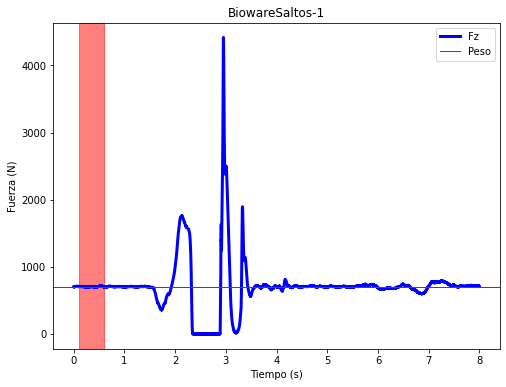

Tiempo de procesado archivo 0.281 s 

Procesando archivo num 2 BiowareSaltos-2


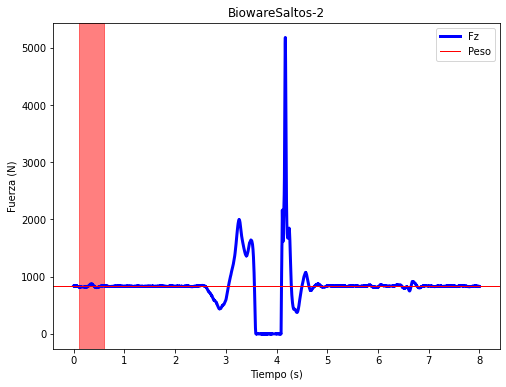

Tiempo de procesado archivo 0.280 s 

Procesando archivo num 3 BiowareSaltos-3


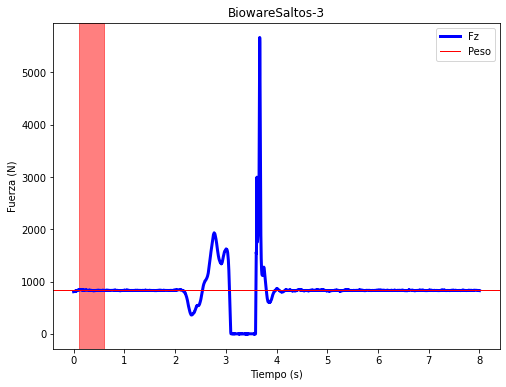

Tiempo de procesado archivo 0.252 s 

Procesando archivo num 4 BiowareSaltos-4


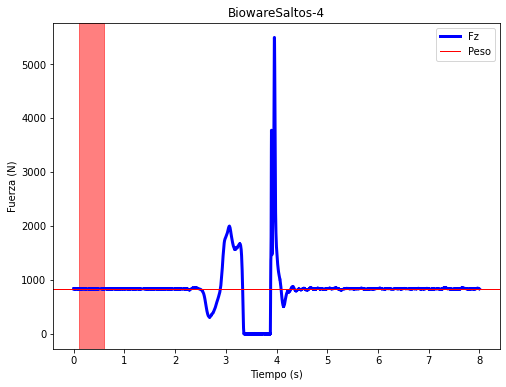

Tiempo de procesado archivo 0.257 s 


ATENCIÓN, no se ha podido procesar BiowareSaltos-5.5-Erroneo Passed header=17 but only 3 lines in file


Procesando archivo num 5 BiowareSaltos-5


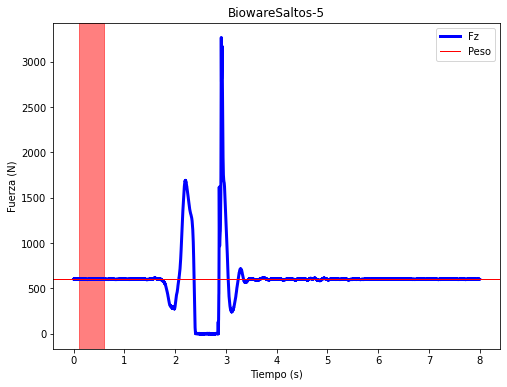

Tiempo de procesado archivo 0.280 s 

Procesando archivo num 6 BiowareSaltos-6-problema


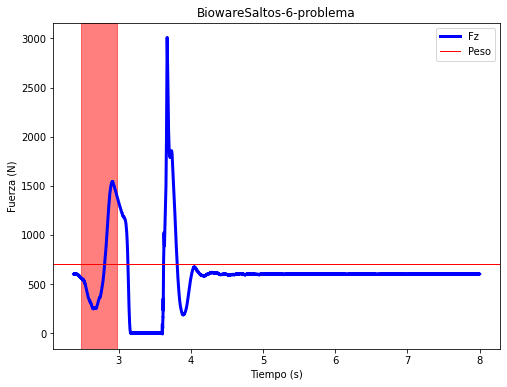

Tiempo de procesado archivo 0.298 s 

Procesando archivo num 7 BiowareSaltos-6


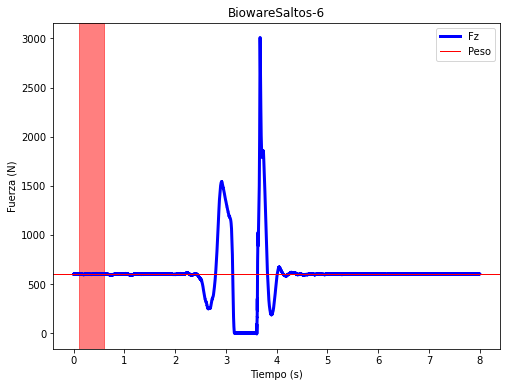

Tiempo de procesado archivo 0.282 s 

Procesando archivo num 8 BiowareSaltos-7


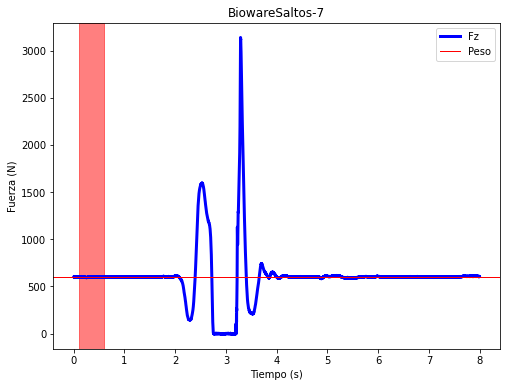

Tiempo de procesado archivo 0.265 s 

Procesando archivo num 9 BiowareSaltos-DJ


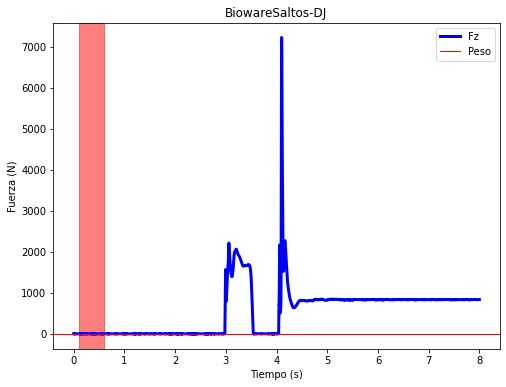

Tiempo de procesado archivo 0.263 s 


Procesados 9 de 10 archivos en la carpeta
Tiempo total 2.468 s

No se ha podido procesar:
BiowareSaltos-5.5-Erroneo Passed header=17 but only 3 lines in file


In [ ]:
print ("A procesar {0:d} archivos".format(len(lista_archivos)))

tpo_total = time.time() #para cuantificar cuánto tarda en procesar todo

num_procesados=0 #contador de los archivos que va procesando
errores_archivos=[]#guarda los nombres de archivo que no se pueden abrir y su error

#Crea el archivo pdf en la misma carpeta
pdf_pages = PdfPages(ruta_trabajo /'GraficasArchivos.pdf')

for nombre_archivo in lista_archivos[:]:
  tpo_archivo = time.time() #inicia el contador de tiempo de cada archivo

  # =============================================================================
  # Lee los datos
  # =============================================================================
  try:
      Datos = pd.read_csv(nombre_archivo, header=17, skiprows=[18], sep=separador)
  except Exception as err: #Si falla anota un error y continua
      print('\nATENCIÓN, no se ha podido procesar '+ nombre_archivo.stem, err)
      errores_archivos.append(nombre_archivo.stem+' '+ str(err))
      print('\n')
      continue

  print ('Procesando archivo num {0:d} {1:s}'.format(num_procesados+1, nombre_archivo.stem))

  # =============================================================================
  # Procesa los datos
  # =============================================================================
  peso=Datos['Fz'][100:600].mean()

  # =============================================================================
  # Crea gráficas
  # =============================================================================
  fig, ax = plt.subplots(figsize=(8,6))
  plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3, label='Fz')
  ax.axhline(y=peso, lw=1, color='r',label='Peso') #marca la línea del peso
  ax.axvspan(Datos['abs time (s)'][100], Datos['abs time (s)'][600], alpha=0.5, color='r') #destaca en rojo el área donde se calcula el promedio del peso
  ax.set_xlabel('Tiempo (s)')
  ax.set_ylabel('Fuerza (N)')
  ax.set_title(nombre_archivo.stem)
  plt.legend()
  plt.show()
  pdf_pages.savefig(fig) #aquí guarda la figura creada en una nueva hoja del pdf

  #Finaliza procesado del archivo
  print('Tiempo de procesado archivo {0:.3f} s \n'.format(time.time()-tpo_archivo))
  num_procesados+=1

#Ya ha terminado de procesar todos los archivos
print('\nProcesados {0:d} de {1:d} archivos en la carpeta'.format(num_procesados, len(lista_archivos)))
print('Tiempo total {0:.3f} s'.format(time.time()-tpo_total))

#Si no ha podido cargar algún archivo, lo indica
if len(errores_archivos)>0:
    print('\nNo se ha podido procesar:')
    for erArch in errores_archivos:
        print(erArch)

#Cierra el archivo pdf
pdf_pages.close()

Normalmente, como se van a procesar muchos archivos y la creación de las gráficas lleva tiempo, interesa incluir variables booleanas que podamos activar o desactivar para ejecutar sólo algunas partes de código, según lo que nos interese en cada momento. De este modo, simplemente tenemos que activar o desactivar la variable al principio del programa en lugar de tener que estar bucean por el código para ver qué partes activar y qué no. En este caso por ejemplo, sería conveniente incluir al principio dos variables con las que controlamos si queremos crear gráficas y si queremos guardarlas en el pdf.

In [ ]:
######################################
#Define condicionales
bCreaGraficas = True #para que cree todas las gráficas y las muestre en pantalla
bGuardaGraficasPdf = True #para que guarde todas las gráficas en un pdf
######################################

Y finalmente comprobar con condicionales *If* si tiene que ejecutar o no las partes de código que se controlan con las variables booleanas.

In [ ]:
#ejemplo
if bCreaGraficas:
    print('Todo lo que tiene que hacer si está activo el condicinal de crear gráficas.')

Todo lo que tiene que hacer si está activo el condicinal de crear gráficas.


#Versión completa graficar archivos

A continuación puedes ver cómo quedaría la **versión final**, que puede servir de **plantilla** para utilizar en cualquier situación adaptando las partes que sean necesarias.

In [ ]:
import os
from pathlib import Path #para gestión de archivos y carpetas
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages #para guardar gráficas en pdf
import time #para cuantificar tiempos de procesado

# Lo siguiente muestra un enlace para que otorguemos permiso para acceder a nuestro Drive
drive.mount('/googledrive', force_remount=True)

Mounted at /googledrive


A procesar 10 archivos
Procesando archivo num 1 BiowareSaltos-1


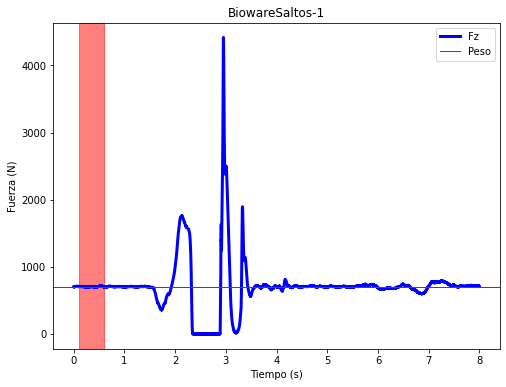

Tiempo de procesado archivo 0.348 s 

Procesando archivo num 2 BiowareSaltos-2


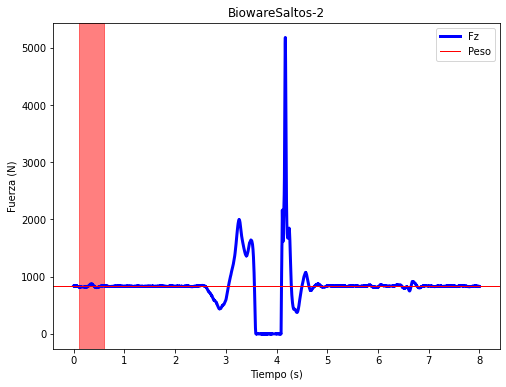

Tiempo de procesado archivo 0.329 s 

Procesando archivo num 3 BiowareSaltos-3


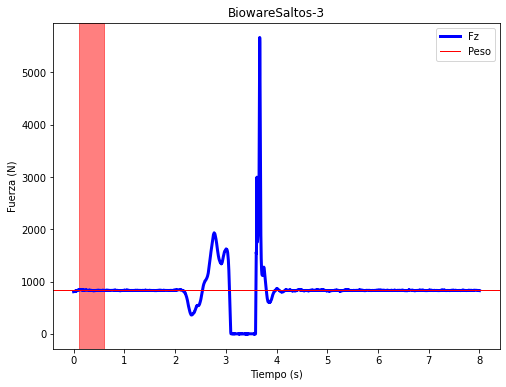

Tiempo de procesado archivo 0.553 s 

Procesando archivo num 4 BiowareSaltos-4


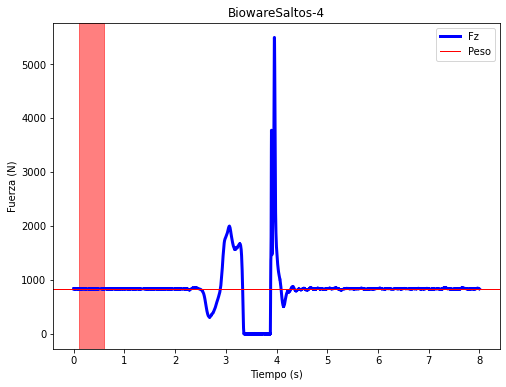

Tiempo de procesado archivo 0.294 s 


ATENCIÓN, no se ha podido procesar BiowareSaltos-5.5-Erroneo Passed header=17 but only 3 lines in file


Procesando archivo num 5 BiowareSaltos-5


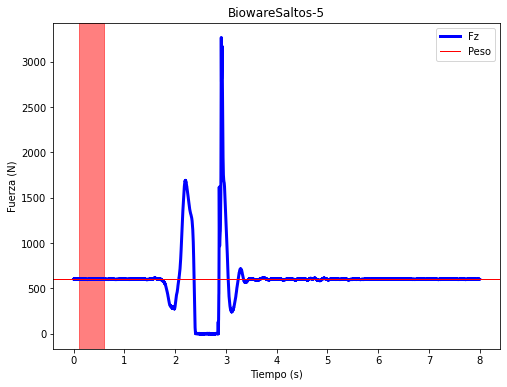

Tiempo de procesado archivo 0.311 s 

Procesando archivo num 6 BiowareSaltos-6-problema


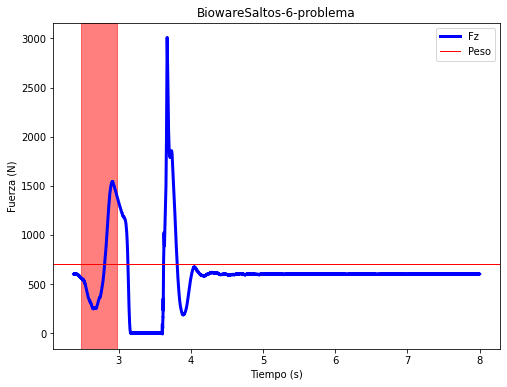

Tiempo de procesado archivo 0.323 s 

Procesando archivo num 7 BiowareSaltos-6


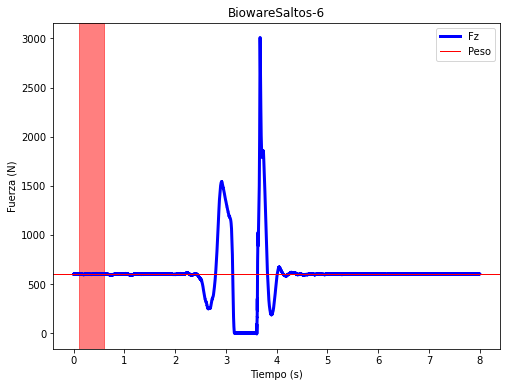

Tiempo de procesado archivo 0.354 s 

Procesando archivo num 8 BiowareSaltos-7


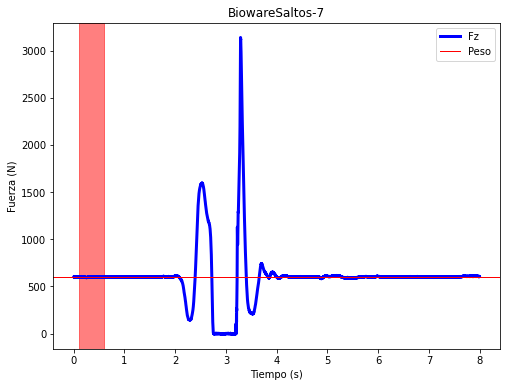

Tiempo de procesado archivo 0.403 s 

Procesando archivo num 9 BiowareSaltos-DJ


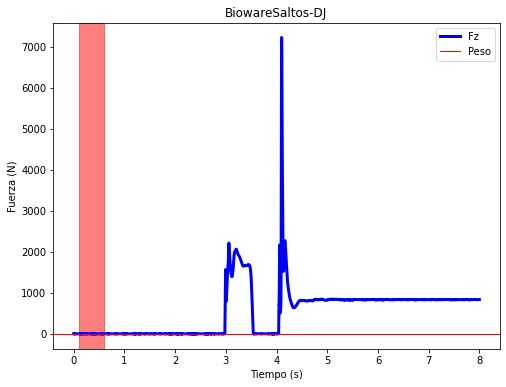

Tiempo de procesado archivo 0.397 s 


Procesados 9 de 10 archivos en la carpeta
Tiempo total 3.342 s

No se ha podido procesar:
BiowareSaltos-5.5-Erroneo Passed header=17 but only 3 lines in file


In [ ]:
ruta_trabajo = Path('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/Saltos')
separador = '\t' #\t para tabulador, en otros archivos se puede necesitar un espacio, o una coma, etc.
lista_archivos = list(ruta_trabajo.glob('**/*.txt')) #crea una lista con todos los archivos de la carpeta y subcarpetas
lista_archivos.sort() #ordena alfabéticamente los archivos encontrados

# =============================================================================
# Define condicionales
bCreaGraficas = True #para que cree todas las gráficas y las muestre en pantalla
bGuardaGraficasPdf = True #para que guarde todas las gráficas en un pdf
# =============================================================================

print ("A procesar {0:d} archivos".format(len(lista_archivos)))

tpo_total = time.time() #para cuantificar cuánto tarda en procesar todo

num_procesados=0 #contador de los archivos que va procesando
errores_archivos=[] #guarda los nombres de archivo que no se pueden abrir y su error

#Crea el archivo pdf en la misma carpeta
if bCreaGraficas and bGuardaGraficasPdf:
  pdf_pages = PdfPages(ruta_trabajo /'GraficasArchivos.pdf')

for nombre_archivo in lista_archivos[:]:
  tpo_archivo = time.time() #inicia el contador de tiempo de cada archivo

  # =============================================================================
  # Lee los datos
  # =============================================================================
  try:
      Datos = pd.read_csv(nombre_archivo, header=17, skiprows=[18], sep=separador)
  except Exception as err: #Si falla anota un error y continua
      print('\nATENCIÓN, no se ha podido procesar '+ nombre_archivo.stem, err)
      errores_archivos.append(nombre_archivo.stem+' '+ str(err))
      print('\n')
      continue

  print ('Procesando archivo num {0:d} {1:s}'.format(num_procesados+1, nombre_archivo.stem))

  # =============================================================================
  # Procesa los datos
  # =============================================================================
  peso=Datos['Fz'][100:600].mean()

  # =============================================================================
  # Crea gráficas
  # =============================================================================
  if bCreaGraficas:
    titulo=nombre_archivo.stem

    fig, ax = plt.subplots(figsize=(8,6))
    plt.plot(Datos['abs time (s)'], Datos['Fz'], color='b', linewidth=3, label='Fz')
    ax.axhline(y=peso, lw=1, color='r',label='Peso') #marca la línea del peso
    ax.axvspan(Datos['abs time (s)'][100], Datos['abs time (s)'][600], alpha=0.5, color='r') #destaca en rojo el área donde se calcula el promedio del peso
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Fuerza (N)')
    ax.set_title(nombre_archivo.stem)
    plt.legend()
    plt.show()
    if bCreaGraficas and bGuardaGraficasPdf:
      pdf_pages.savefig(fig)

  #Finaliza procesado del archivo
  print('Tiempo de procesado archivo {0:.3f} s \n'.format(time.time()-tpo_archivo))
  num_procesados+=1

#Ya ha terminado de procesar todos los archivos
print('\nProcesados {0:d} de {1:d} archivos en la carpeta'.format(num_procesados, len(lista_archivos)))
print('Tiempo total {0:.3f} s'.format(time.time()-tpo_total))

#Si no ha podido cargar algún archivo, lo indica
if len(errores_archivos)>0:
    print('\nNo se ha podido procesar:')
    for erArch in errores_archivos:
        print(erArch)

#Cierra el archivo pdf
if bCreaGraficas and bGuardaGraficasPdf:
  pdf_pages.close()

# Graficar carpeta (versión pro)

A continuación veremos una forma más avanzada de representar gráficamente el contenido de carpetas, que resultará más útil cuando tenemos archivos que contemplan mediciones con distintos factores o variables de agrupación.
Un ejemplo puede ser cuando tenemos varios grupos de investigación, mediciones pre/postest, con varias series y repeticiones, etc. Es conveniente en estos casos que el nombre de los archivos siga un criterio de nombrado que permita identificar todos esos factores directamente. Un ejemplo puede ser el siguiente:

**S01_GC_pre_01_02**. Esto puede querer decir sujeto 1, del grupo control, y el ensayo corresponde a la medición pretest, serie 1 y repetición 1. De esta forma podremos etiquetar los datos de cada archivo con facilidad y trasladarlo automáticamente al etiquetado de los datos que cargamos. Lo que es importante es **mantener el mismo criterio en todos los archivos al hacer las mediciones**.

En este caso, lo que haremos será cargar de un tirón todos los archivos en un mismo *dataframe* (el tipo de variable de la librería *Pandas* que funciona de forma similar a una hoja de cálculo), que después podremos usar para hacer las gráficas y para tratar los datos. De esta forma podremos utilizar herramientas que nos facilitarán todas estas tareas.

Vamos a probar con los archivos de la carpeta [ArchivosPorFactoresCOPFake](https://github.com/joselvira/BiomecanicaPython/tree/master/Datos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake), que contiene archivos de test ficticios de estabilidad sobre plataforma de fuerzas con etiquetas por factores. Puedes copiar los archivos y meterlos en una carpeta de tu *Drive* a la que accederemos después.

Abrimos uno como ejemplo para ver lo que contiene.

In [ ]:
import os
from pathlib import Path #para gestión de archivos y carpetas
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages #para guardar gráficas en pdf
import seaborn as sns
import time #para cuantificar tiempos de procesado

# Lo siguiente muestra un enlace para que otorguemos permiso para acceder a nuestro Drive
drive.mount('/googledrive', force_remount=True)

Mounted at /googledrive


In [ ]:
ruta_trabajo = Path('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake')
nom_archivo = 's01_GC_post.csv'

Datos = pd.read_csv(ruta_trabajo/nom_archivo)
Datos

time        ML        AP
0      0.00  1.319402  3.061414
1      0.01  1.288564  3.053625
2      0.02  1.259551  3.045145
3      0.03  1.234727  3.035176
4      0.04  1.215788  3.023284
...     ...       ...       ...
1995  19.95  0.548275  3.024590
1996  19.96  0.561147  3.295400
1997  19.97  0.576647  3.579426
1998  19.98  0.594079  3.876120
1999  19.99  0.612934  4.183139

[2000 rows x 3 columns]

Los archivos están nombrados siguiendo el criterio *nº participante_grupo_tiempo*. Utilizaremos el propio nombre de los archivos para establecer las categorías de agrupación.

Hacemos como antes para obtener la ruta de todos los archivos de la carpeta.

In [ ]:
lista_archivos = list(ruta_trabajo.glob('**/*.csv')) #crea una lista con todos los archivos de la carpeta y subcarpetas
lista_archivos.sort() #ordena los resultados por orden alfabético
lista_archivos

[PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake/s01_GC_post.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake/s01_GC_pre.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake/s02_GC_post.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake/s02_GC_pre.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake/s03_GC_post.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake/s03_GC_pre.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactoresCOPFake/s04_GC_post.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/PlatFuerzas/COP/ArchivosPorFactor

Y procedemos a cargar los archivos en memoria en una sola variable, que se llamará *dfTodosArchivos*. Como son bastantes archivos tardará un rato en completar la operación.

La explicación paso a paso de cómo se realiza todo el proceso se encontrará en otro notebook.

In [ ]:
dfTodosArchivos = [] #guarda los dataframes que va leyendo en formato lista y al final los concatena
errores_archivos = [] #guarda los nombres de archivo que no se pueden abrir y su error
num_archivos_procesados = 0
tiempo_todos = time.time() #inicia el contador de tiempo
for nf, nombre_archivo in enumerate(lista_archivos[:]):
    try:
        tiempo_archivo = time.time() #inicia el contador de tiempo del archivo

        print('Cargando archivo nº {0}: {1:s}'.format(nf, nombre_archivo.name))
        Datos = pd.read_csv(nombre_archivo)

        #asigna etiquetas con los nombres de los factores
        ID=nombre_archivo.stem.split('_')[0]
        grupo=nombre_archivo.stem.split('_')[1]
        tiempo=nombre_archivo.stem.split('_')[2]

        #Carga el dataframe comun y asigna nombres a las columnas según el factor
        dfTodosArchivos.append(Datos.assign(**{'ID':ID, 'grupo':grupo, 'tiempo':tiempo}).reset_index(drop=True))

    except Exception as err: #Si falla anota un error y continua
        print('\nATENCIÓN. No se ha podido procesar {0}, {1}, {2}'.format(nombre_archivo.parent.name, nombre_archivo.name, err), '\n')
        errores_archivos.append(nombre_archivo.parent.name+' '+nombre_archivo.name+' '+ str(err))
        continue

    #Termina el archivo
    print('{0} filas y {1} columnas'.format(dfTodosArchivos[-1].shape[0], dfTodosArchivos[-1].shape[1]))
    print('Tiempo {0:.3f} s \n'.format(time.time()-tiempo_archivo))
    num_archivos_procesados+=1


#concatena en un mismo dataframe todos los dataframes individuales de la lista
dfTodosArchivos = pd.concat(dfTodosArchivos)

#Coloca los factores en formato long
dfTodosArchivos = pd.melt(dfTodosArchivos, id_vars=['ID', 'grupo', 'tiempo', 'time'], var_name='variable', value_name='valor')
#dfTodosArchivos = dfTodosArchivos.set_index(['ID', 'grupo', 'tiempo', 'time'])

print('Cargados {0:d} archivos en {1:.3f} s \n'.format(num_archivos_procesados, time.time()-tiempo_todos))
#Si no ha podido cargar algún archivo, lo indica
if len(errores_archivos) > 0:
    print('\nATENCIÓN. No se ha podido cargar:')
    for x in range(len(errores_archivos)):
        print(errores_archivos[x])


Cargando archivo nº 0: s01_GC_post.csv
2000 filas y 6 columnas
Tiempo 0.013 s 

Cargando archivo nº 1: s01_GC_pre.csv
2000 filas y 6 columnas
Tiempo 0.407 s 

Cargando archivo nº 2: s02_GC_post.csv
2000 filas y 6 columnas
Tiempo 0.483 s 

Cargando archivo nº 3: s02_GC_pre.csv
2000 filas y 6 columnas
Tiempo 0.357 s 

Cargando archivo nº 4: s03_GC_post.csv
2000 filas y 6 columnas
Tiempo 0.548 s 

Cargando archivo nº 5: s03_GC_pre.csv
2000 filas y 6 columnas
Tiempo 0.403 s 

Cargando archivo nº 6: s04_GC_post.csv
2000 filas y 6 columnas
Tiempo 0.516 s 

Cargando archivo nº 7: s04_GC_pre.csv
2000 filas y 6 columnas
Tiempo 0.403 s 

Cargando archivo nº 8: s05_GC_post.csv
1960 filas y 6 columnas
Tiempo 0.424 s 

Cargando archivo nº 9: s05_GC_pre.csv
2000 filas y 6 columnas
Tiempo 0.528 s 

Cargando archivo nº 10: s06_GC_post.csv
2000 filas y 6 columnas
Tiempo 0.350 s 

Cargando archivo nº 11: s06_GC_pre.csv
2000 filas y 6 columnas
Tiempo 0.471 s 

Cargando archivo nº 12: s07_GC_post.csv
2000

Este es el dataframe que hemos creado con todos los archivos juntos . Se han colocado los datos de cada archivo unos encima de otros (llamado formato *long*) y están etiquetados según su nombre. Fíjate en que el número de filas es enorme.

In [ ]:
dfTodosArchivos

ID grupo tiempo   time variable     valor
0       s01    GC   post   0.00       ML  1.319402
1       s01    GC   post   0.01       ML  1.288564
2       s01    GC   post   0.02       ML  1.259551
3       s01    GC   post   0.03       ML  1.234727
4       s01    GC   post   0.04       ML  1.215788
...     ...   ...    ...    ...      ...       ...
231601  s30    GE    pre  19.95       AP -0.302587
231602  s30    GE    pre  19.96       AP -0.214388
231603  s30    GE    pre  19.97       AP -0.126228
231604  s30    GE    pre  19.98       AP -0.037396
231605  s30    GE    pre  19.99       AP  0.053825

[231606 rows x 6 columns]

Ahora creamos una figura con la que podemos ver de un vistazo los datos de todos los archivos separados por sujeto.

Utilizaremos la librería ***Seaborn***, muy interesante para crear gráficas con datos clasificados por categorías.

En este caso, manejamos conjutamente tres factores en los que se dividen los datos: sujeto, tiempo (pre o post) y variable (ML o AP).

Primero importamos la librería *seaborn* y después creamos la figura ¡en una sola línea!

En cada cuadro se representan los datos de cada participante con toda la información: el color representa la variable, y el trazo el factor tiempo.

¡Y recuerda que se hace en una sola línea!

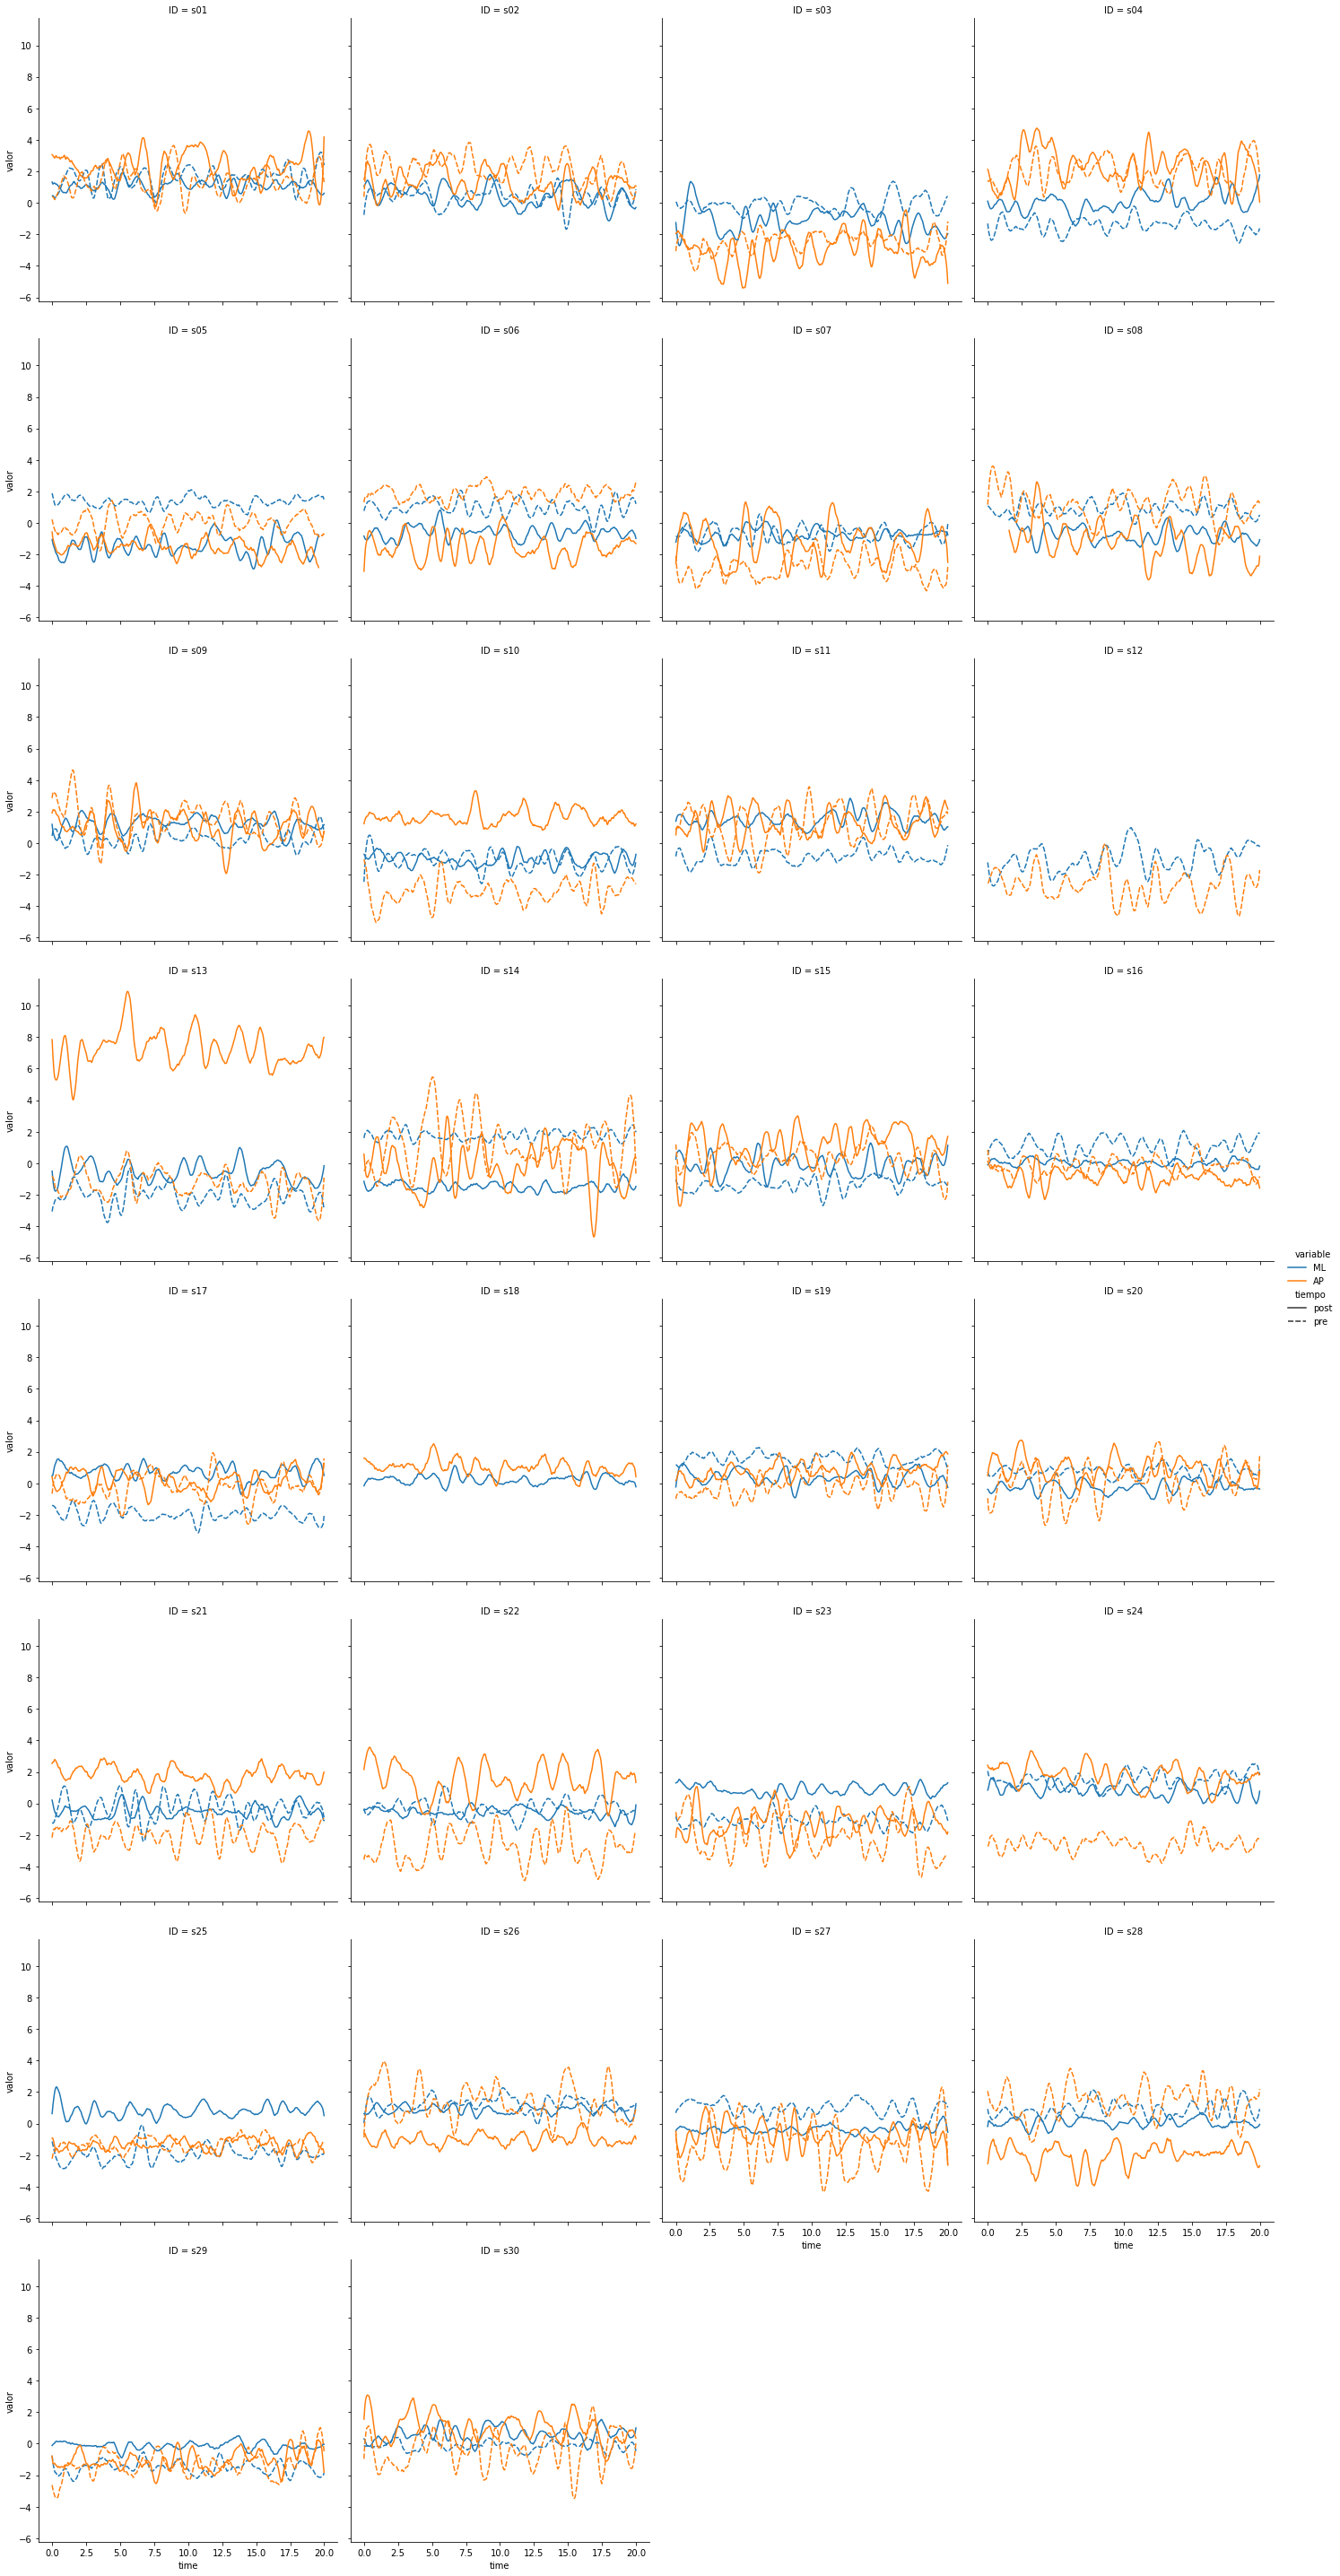

In [ ]:
import seaborn as sns
sns.relplot(data=dfTodosArchivos, x='time', y='valor',  col='ID', col_wrap=4, hue='variable', style='tiempo', estimator=None, kind='line') #, palette=sns.color_palette('tab10',2)

Modificando ligeramente las instrucciones de la función *sns.relplot()* se pueden representar los datos de muchas formas distintas. Podemos crear por separado una hoja para los resultados pretest y postest, y en cada una de ellas ver en cada gráfica las variables de cada sujeto, o como queramos.

Ahora guardamos en un pdf las gráficas. En este primer caso se guarda una hoja por condición del factor tiempo, es decir, una para el pretest y otra para el postest.
También se puede dar un poco más de formato a cada figura, como por ejemplo, ponerle título.

Como son gráficas grandes, le lleva un tiempo crearlas.

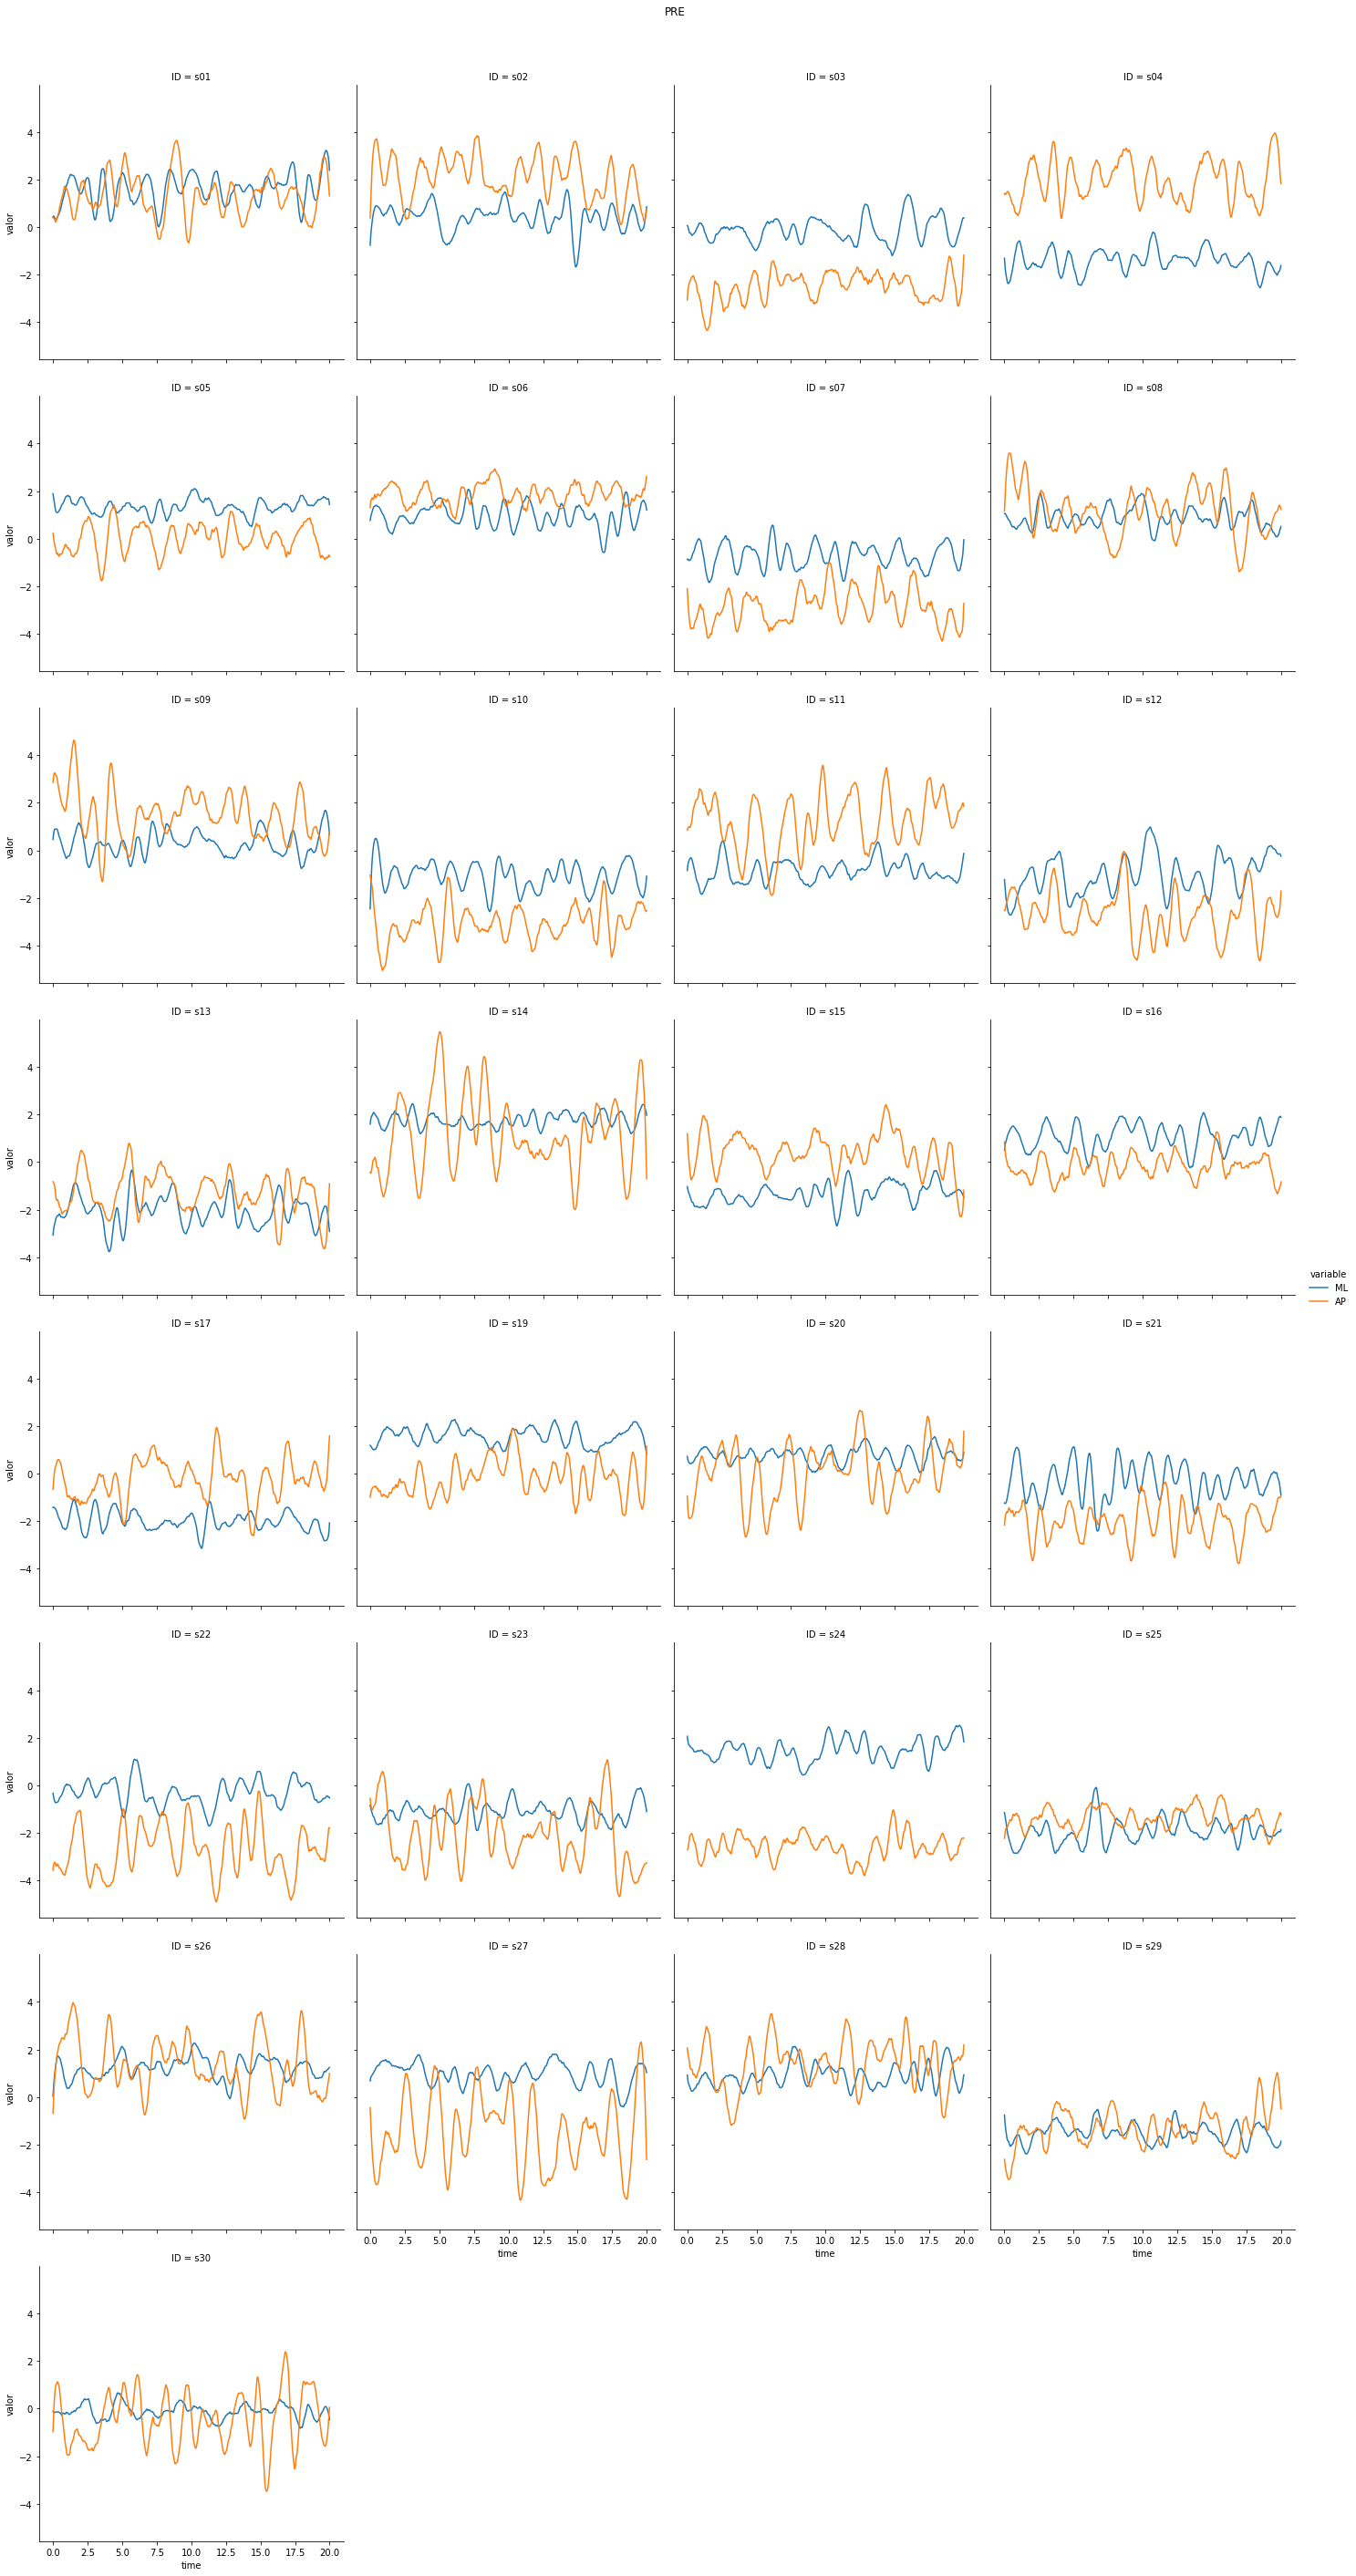

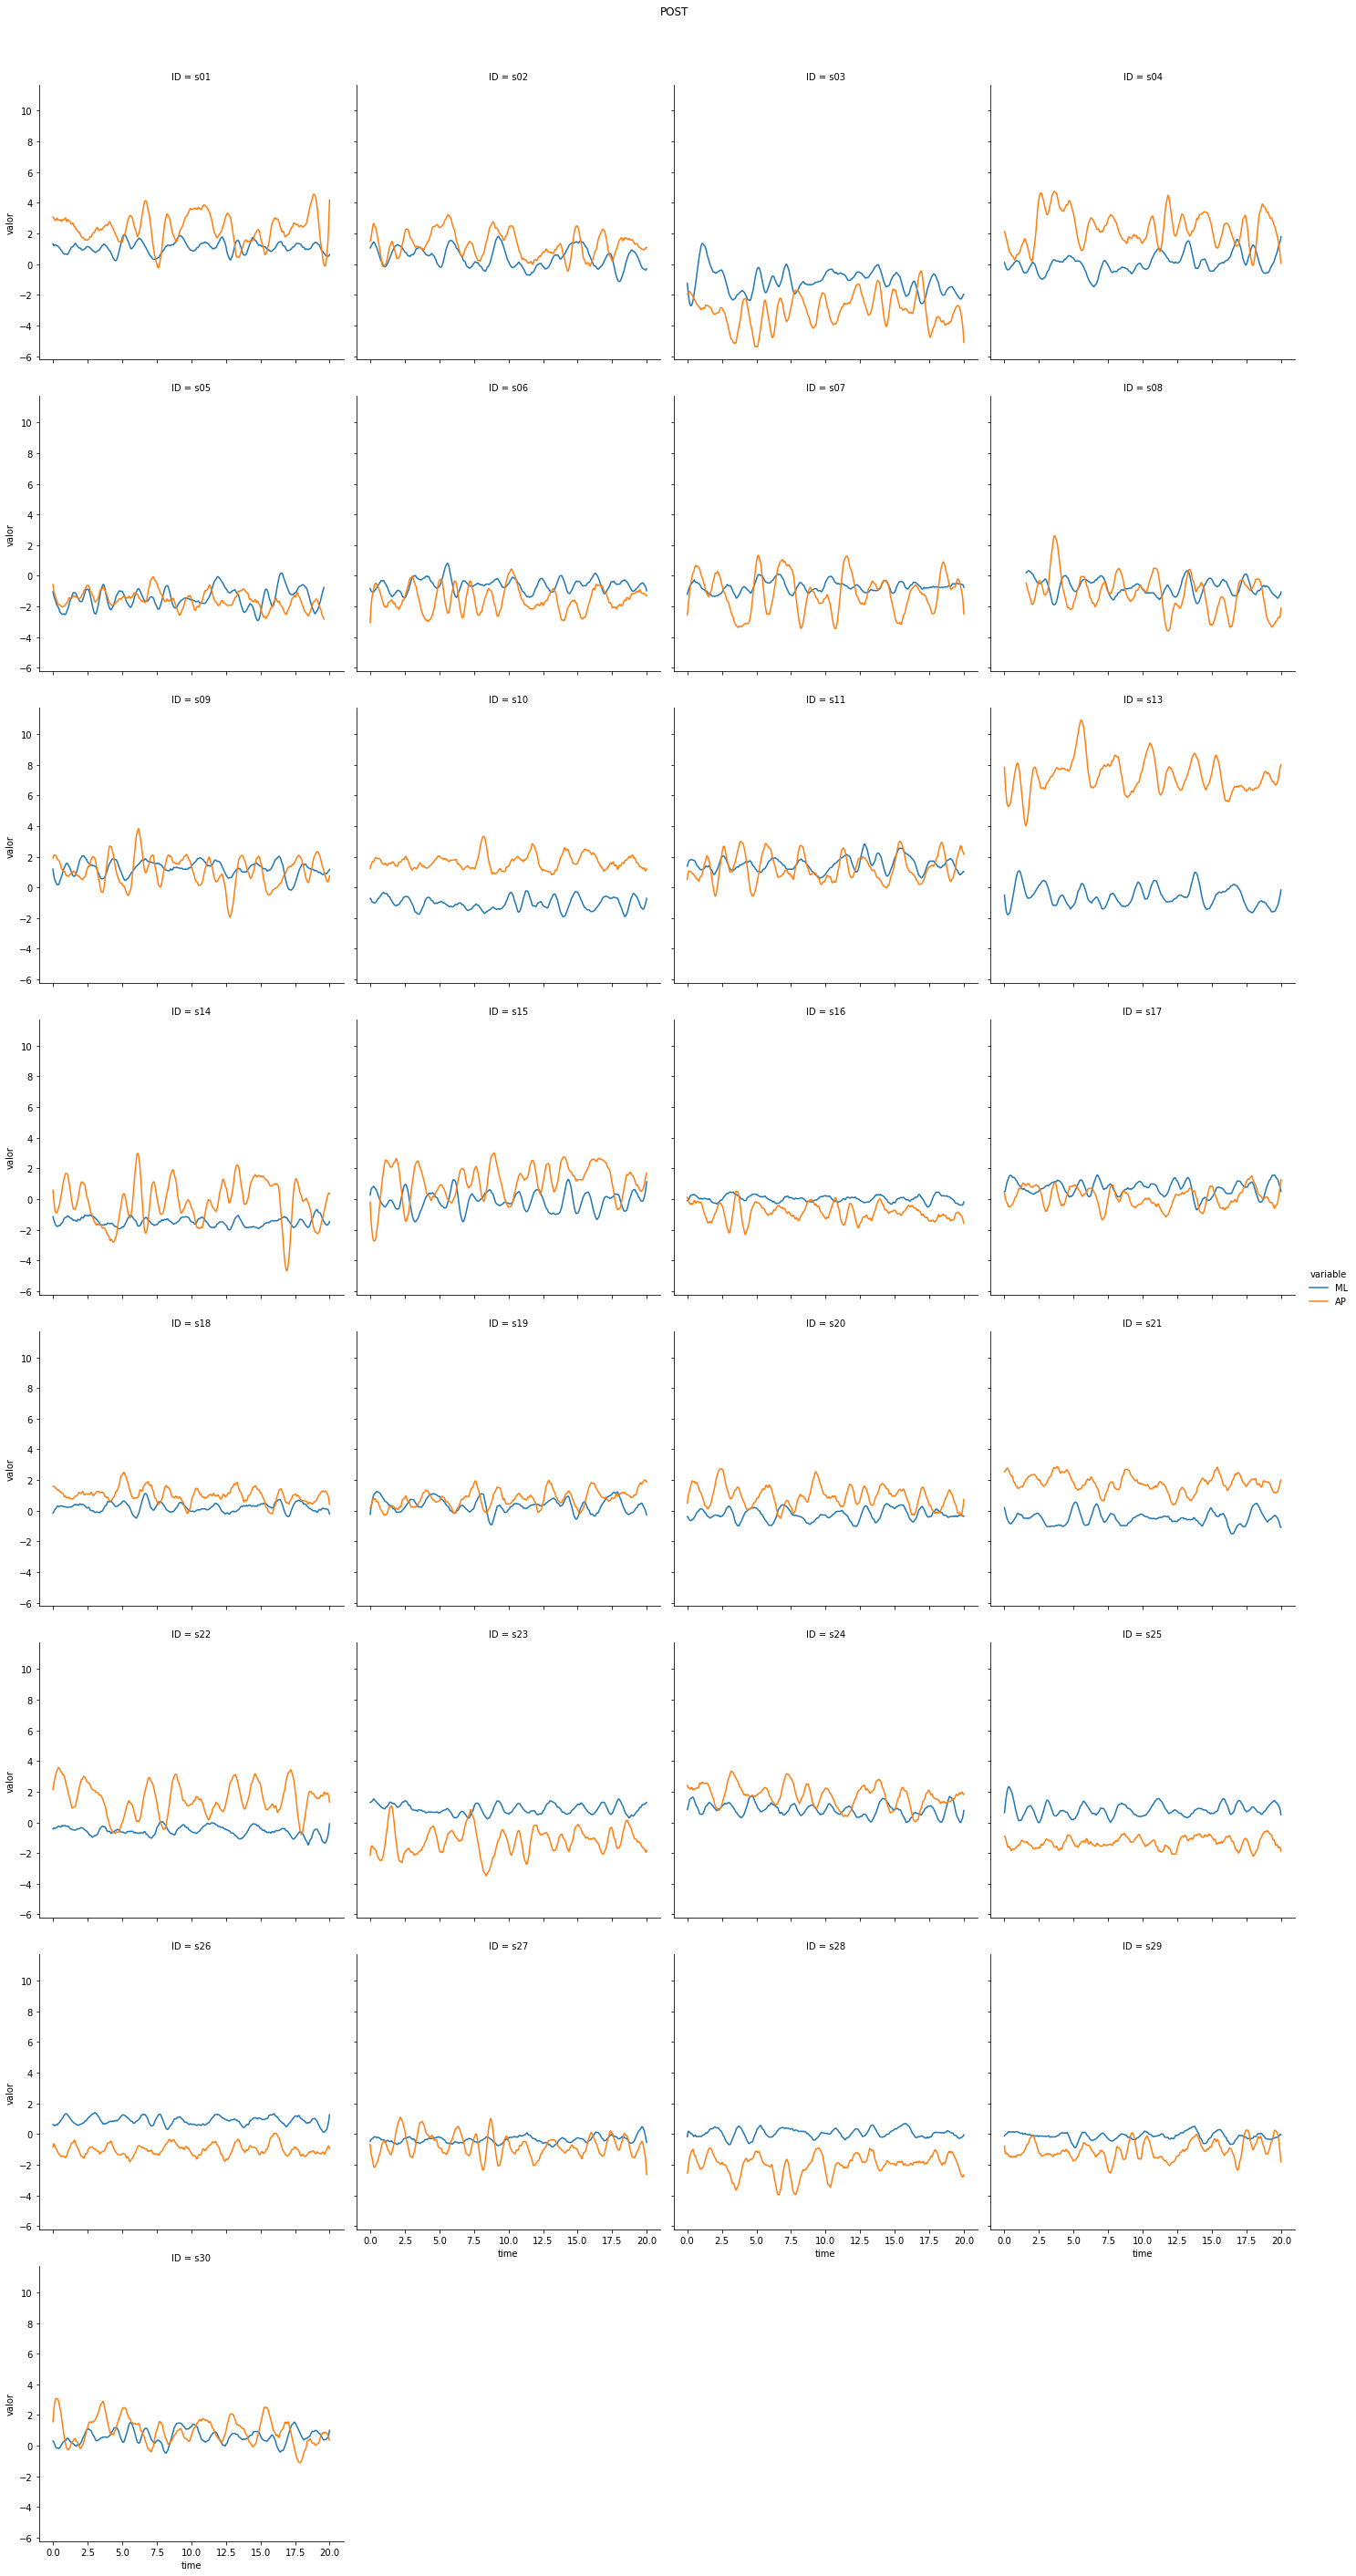

In [ ]:
nompdf = ruta_trabajo / 'DatosCOPFake_tiempo.pdf' #nombre del archivo pdf
with PdfPages(nompdf) as pdf_pages:
  #Gráfica del pretest
  g=sns.relplot(data=dfTodosArchivos.query('tiempo=="pre"'), x='time', y='valor',  col='ID', col_wrap=4, estimator=None, hue='variable', kind='line')
  g.fig.subplots_adjust(top=0.95)
  g.fig.suptitle('PRE')
  pdf_pages.savefig(g.fig)

  #Gráfica del postest
  g=sns.relplot(data=dfTodosArchivos.query('tiempo=="post"'), x='time', y='valor',  col='ID', col_wrap=4, estimator=None, hue='variable', kind='line')
  g.fig.subplots_adjust(top=0.95)
  g.fig.suptitle('POST')
  pdf_pages.savefig(g.fig)



Otra opción puede ser ver en cada fila toda la información de cada sujeto.

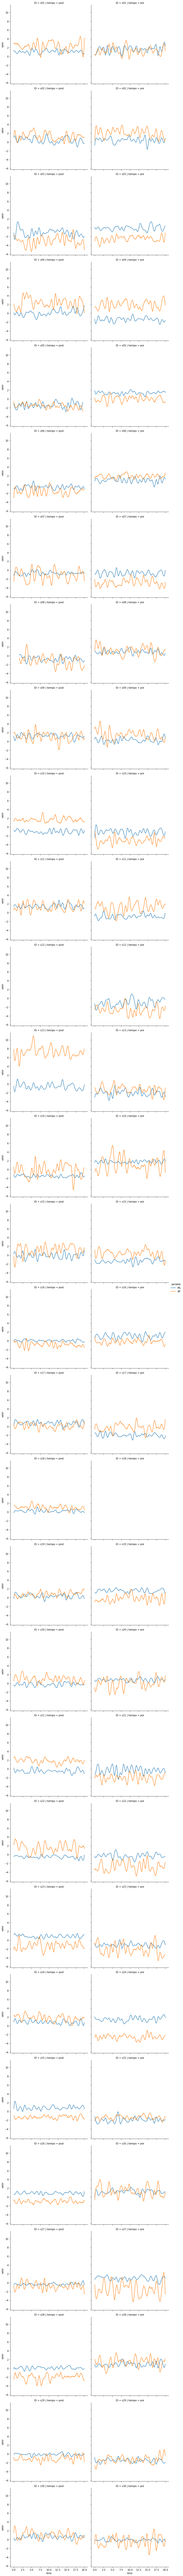

In [ ]:
nompdf = ruta_trabajo / 'DatosCOPFake_sujetos.pdf'
with PdfPages(nompdf) as pdf_pages:
  g=sns.relplot(data=dfTodosArchivos, x='time', y='valor',  col='tiempo', row='ID', hue='variable', estimator=None, kind='line')
  pdf_pages.savefig(g.fig)



Con esta configuración de gráfica se pueden detectar rápidamente archivos que faltan, como por ejemplo en el participante 12 en el post, que la gráfica está vacía.

Lo interesante es que se pueden hacer agrupaciones según nos convenga. Por ejemplo podemos poner en filas la variable y en columnas el factor tiempo. De esta forma podemos ver en el mismo cuadro a todos los sujetos, y así poder fácilmente identificar resultados que llamen la atención y que pueden ser debidos a errores.

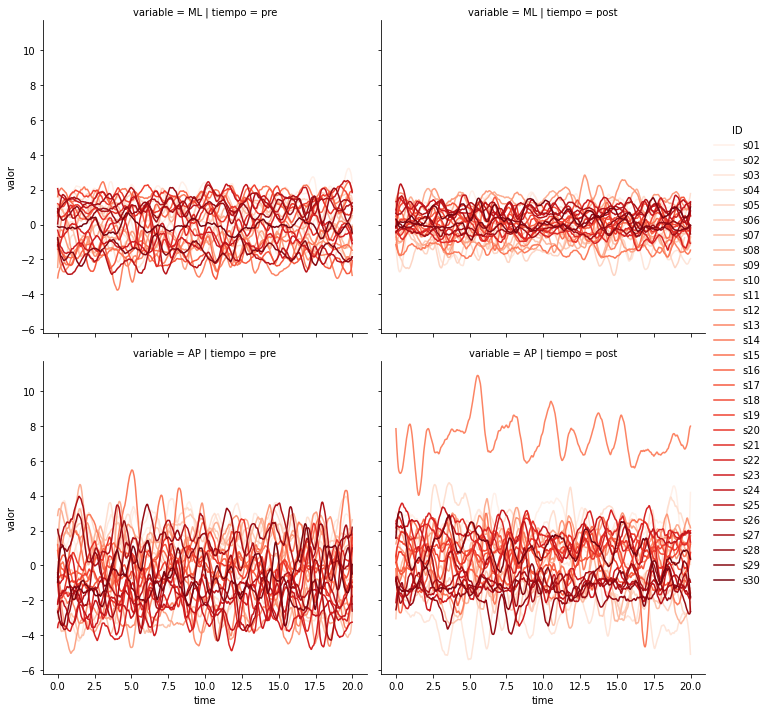

In [ ]:
sns.relplot(data=dfTodosArchivos, x='time', y='valor',  col='tiempo', col_order=['pre', 'post'], row='variable', hue='ID', estimator=None, kind='line', palette=sns.color_palette('Reds',30))

En la gráfica anterior, ¿puedes ver cómo en el cuadro de la variable AP y el tiempo post **hay una línea que está claramente alejada de las demás**? Seguramente sea un error de registro, y de esta forma se puede detectar rápidamente de un vistazo.

En este caso, como tenemos datos de COP puede ser conveniente representar las variables ML y AP una contra otra, para tener el plano en el que se mueve el COP.

Para ello necesitamos reordenar los datos, para tener cada variable en una columna, en lugar de tener las dos apiladas en la columna *variable*. Esta forma de agrupar los datos se le llama *tidy*, mientras que la anterior era *long*.

Por cierto, en el notebook [Transformar_Bases_de_Datos](https://github.com/joselvira/BiomecanicaPython/blob/master/Notebooks/Transformar_Bases_de_Datos.ipynb) puedes ver ejemplos de cómo transformar bases de datos en formato horizontal a vertical y biceversa.

In [ ]:
dfTodosArchivosTidy = dfTodosArchivos.set_index(['ID', 'grupo', 'tiempo', 'time', 'variable']).unstack(level=-1).droplevel(0, axis=1)
dfTodosArchivosTidy

variable                      AP        ML
ID  grupo tiempo time                     
s01 GC    post   0.00   3.061414  1.319402
                 0.01   3.053625  1.288564
                 0.02   3.045145  1.259551
                 0.03   3.035176  1.234727
                 0.04   3.023284  1.215788
...                          ...       ...
s30 GE    pre    19.95 -0.302587 -0.286024
                 19.96 -0.214388 -0.325360
                 19.97 -0.126228 -0.369760
                 19.98 -0.037396 -0.418421
                 19.99  0.053825 -0.470180

[115803 rows x 2 columns]

Una vez reagrupado el conjunto de datos, utilizamos la misma instrucción que antes pero incluyendo *x='ML'*, *y='AP'*, e **IMPORTANTE**, añadir el parámetro *sort=False* para que no intente colocar los datos por orden, y también hay que añadir *estimator=None* para que no pierda tiempo (puede llegar a ser muuucho tiempo) intentando calcular el promedio de los diferentes ensayos.

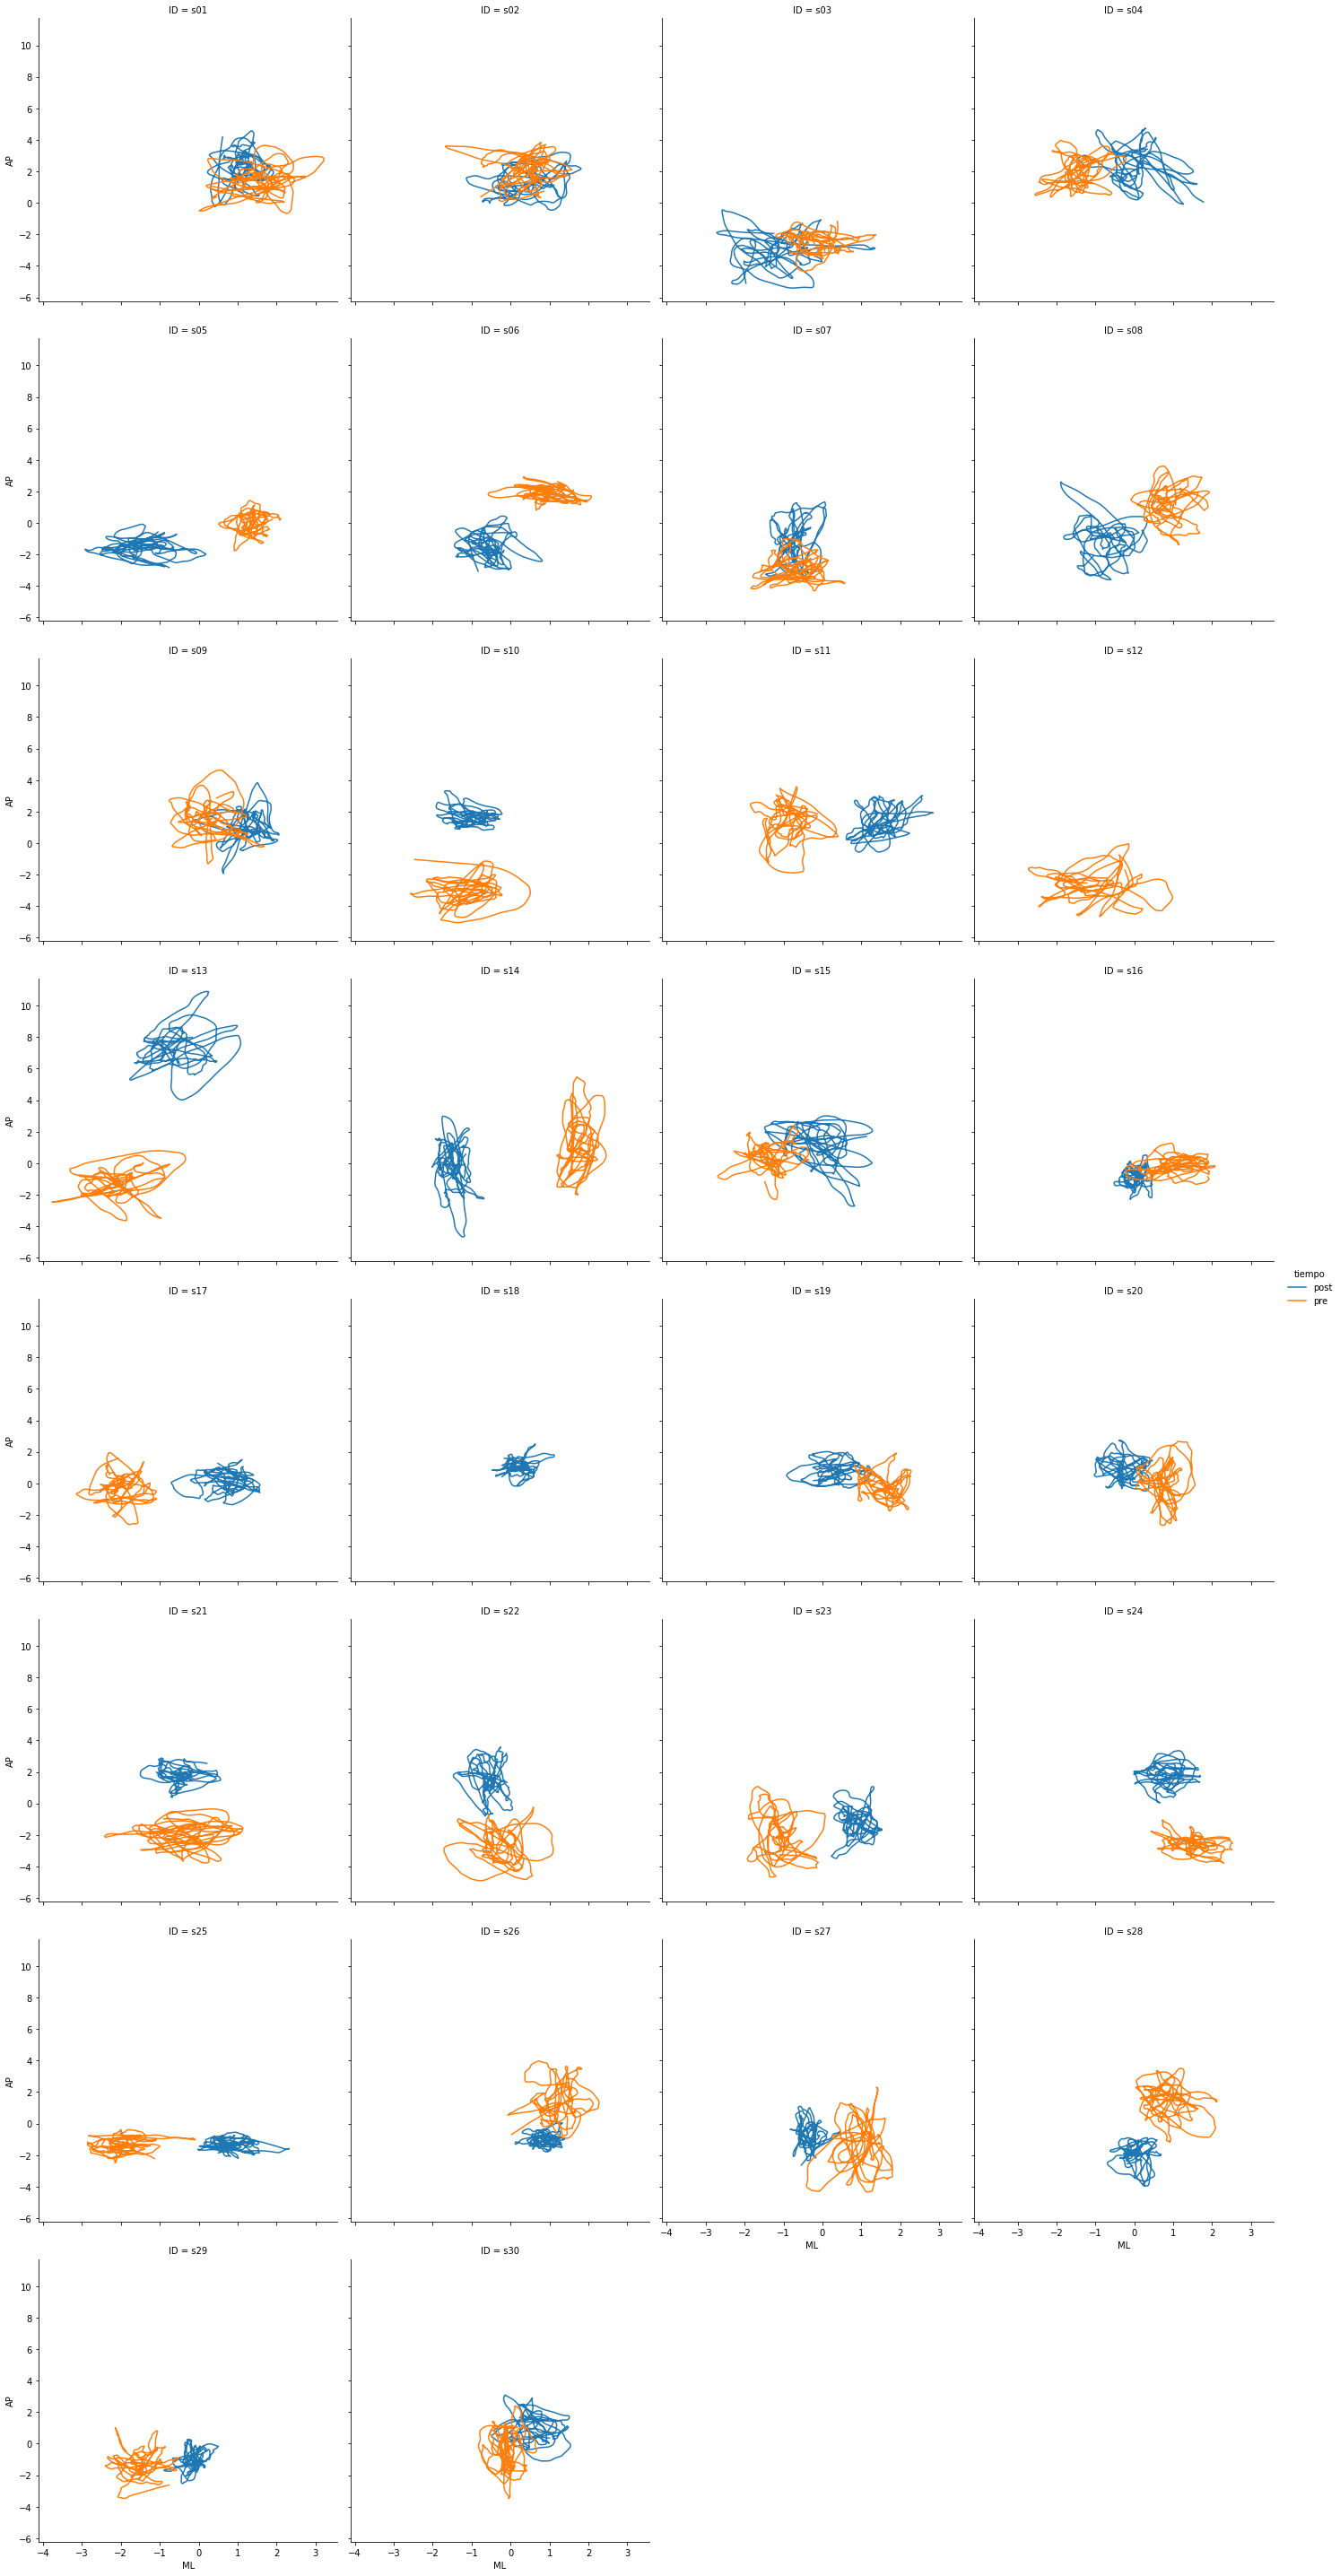

In [ ]:
sns.relplot(data=dfTodosArchivosTidy, x='ML', y='AP',  col='ID', col_wrap=4, hue='tiempo', estimator=None, kind='line', sort=False)

Podemos probar otras formas de representar que pueden ser útiles según lo que estemos buscando...

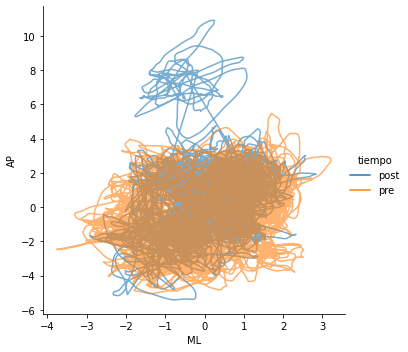

In [ ]:
sns.relplot(data=dfTodosArchivosTidy, x='ML', y='AP', hue='tiempo', estimator=None, kind='line', sort=False, alpha=0.6)

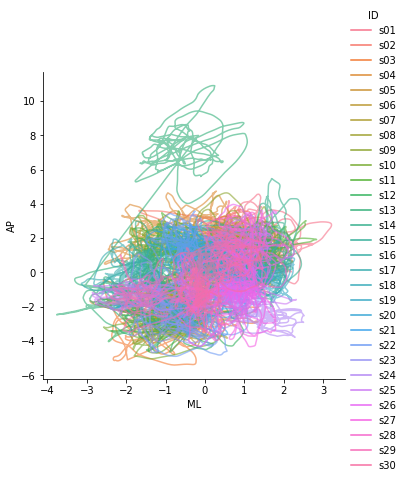

In [ ]:
sns.relplot(data=dfTodosArchivosTidy, x='ML', y='AP', hue='ID', estimator=None, kind='line', sort=False, alpha=0.6)

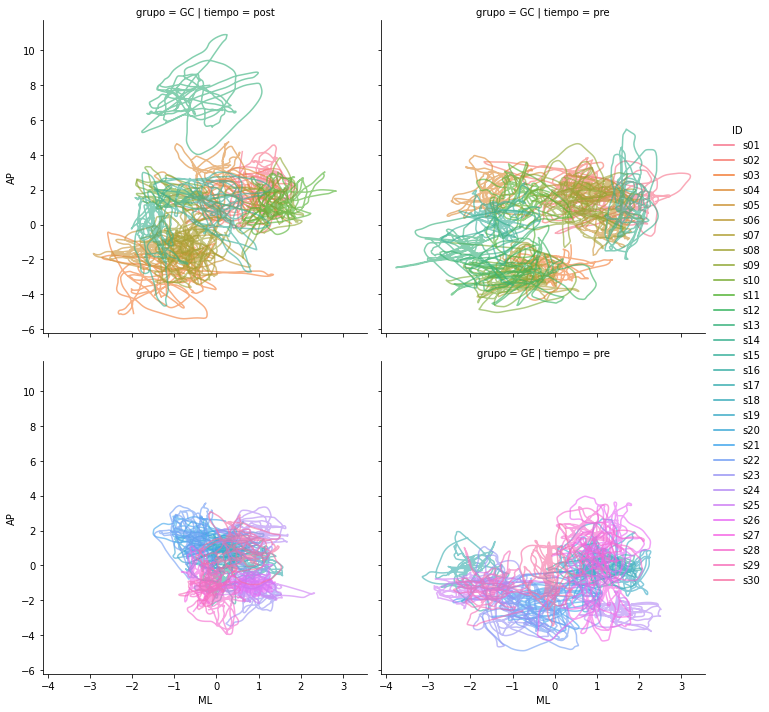

In [ ]:
sns.relplot(data=dfTodosArchivosTidy, x='ML', y='AP', hue='ID', row='grupo', col='tiempo', estimator=None, kind='line', sort=False, alpha=0.6)

## Otro ejemplo. Graficar carpeta de datos random

Para hacer otra prueba vamos a realizar las gráficas de los archivos de la carpeta [ArchivosPorFactoresCinematicaFake](https://github.com/joselvira/BiomecanicaPython/tree/master/Datos/ArchivosPorFactoresCinematicaFake) siguiendo el ejemplo de la versión pro.

In [ ]:
import os
from pathlib import Path #para gestión de archivos y carpetas
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages #para guardar gráficas en pdf
import seaborn as sns
import time #para cuantificar tiempos de procesado

# Lo siguiente muestra un enlace para que otorguemos permiso para acceder a nuestro Drive
drive.mount('/googledrive', force_remount=True)

Mounted at /googledrive


Cargamos un archivo para comprobar que funciona.

In [ ]:
ruta_trabajo = Path('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake')
nom_archivo = 's01_0.csv'

Datos = pd.read_csv(ruta_trabajo/nom_archivo)
Datos

time      valor
0    0.000  78.467821
1    0.005  80.904254
2    0.010  83.352133
3    0.015  85.805303
4    0.020  88.261952
..     ...        ...
144  0.720  21.872577
145  0.725  22.964882
146  0.730  24.177042
147  0.735  25.502999
148  0.740  26.930432

[149 rows x 2 columns]

Cargamos todos los archivos *.csv* de la carpeta y los mostramos.

In [ ]:
lista_archivos = list(ruta_trabajo.glob('**/*.csv')) #crea una lista con todos los archivos de la carpeta y subcarpetas
lista_archivos.sort() #ordena los resultados por orden alfabético
lista_archivos

[PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake/s01_0.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake/s01_1.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake/s01_2.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake/s01_3.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake/s01_4.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake/s02_0.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake/s02_1.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCinematicaFake/s02_2.csv'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/ArchivosEjemplos/ArchivosPorFactoresCi

Cargamos todos los archivos en una misma variable (*dfTodosArchivos*).

In [ ]:
dfTodosArchivos = [] #guarda los dataframes que va leyendo en formato lista y al final los concatena
errores_archivos = [] #guarda los nombres de archivo que no se pueden abrir y su error
num_archivos_procesados = 0
tiempo_todos = time.time() #inicia el contador de tiempo
for nf, nombre_archivo in enumerate(lista_archivos[:]):
    try:
        tiempo_archivo = time.time() #inicia el contador de tiempo del archivo

        print('Cargando archivo nº {0}: {1:s}'.format(nf, nombre_archivo.name))
        Datos = pd.read_csv(nombre_archivo)

        #asigna etiquetas con los nombres de los factores
        ID=nombre_archivo.stem.split('_')[0]
        repe=nombre_archivo.stem.split('_')[1]

        #Carga el dataframe comun y asigna nombres a las columnas según el factor
        dfTodosArchivos.append(Datos.assign(**{'ID':ID, 'repe':repe}).reset_index(drop=True))

    except Exception as err: #Si falla anota un error y continua
        print('\nATENCIÓN. No se ha podido procesar {0}, {1}, {2}'.format(nombre_archivo.parent.name, nombre_archivo.name, err), '\n')
        errores_archivos.append(nombre_archivo.parent.name+' '+nombre_archivo.name+' '+ str(err))
        continue

    #Termina el archivo
    print('{0} filas y {1} columnas'.format(dfTodosArchivos[-1].shape[0], dfTodosArchivos[-1].shape[1]))
    print('Tiempo {0:.3f} s \n'.format(time.time()-tiempo_archivo))
    num_archivos_procesados+=1

#concatena en un mismo dataframe todos los dataframes individuales de la lista
dfTodosArchivos = pd.concat(dfTodosArchivos)

#Coloca los factores en formato long
dfTodosArchivos = pd.melt(dfTodosArchivos, id_vars=['ID', 'repe', 'time'], var_name='variable', value_name='valor')
#dfTodosArchivos = dfTodosArchivos.set_index(['partID', 'grupo', 'tiempo', 'time'])

print('Cargados {0:d} archivos en {1:.3f} s \n'.format(num_archivos_procesados, time.time()-tiempo_todos))
#Si no ha podido cargar algún archivo, lo indica
if len(errores_archivos) > 0:
    print('\nATENCIÓN. No se ha podido cargar:')
    for x in range(len(errores_archivos)):
        print(errores_archivos[x])

Cargando archivo nº 0: s01_0.csv
149 filas y 4 columnas
Tiempo 0.009 s 

Cargando archivo nº 1: s01_1.csv
142 filas y 4 columnas
Tiempo 0.411 s 

Cargando archivo nº 2: s01_2.csv
145 filas y 4 columnas
Tiempo 0.752 s 

Cargando archivo nº 3: s01_3.csv
137 filas y 4 columnas
Tiempo 0.009 s 

Cargando archivo nº 4: s01_4.csv
136 filas y 4 columnas
Tiempo 0.012 s 

Cargando archivo nº 5: s02_0.csv
139 filas y 4 columnas
Tiempo 0.009 s 

Cargando archivo nº 6: s02_1.csv
140 filas y 4 columnas
Tiempo 0.013 s 

Cargando archivo nº 7: s02_2.csv
138 filas y 4 columnas
Tiempo 0.043 s 

Cargando archivo nº 8: s02_3.csv
139 filas y 4 columnas
Tiempo 0.008 s 

Cargando archivo nº 9: s02_4.csv
150 filas y 4 columnas
Tiempo 0.014 s 

Cargando archivo nº 10: s03_0.csv
137 filas y 4 columnas
Tiempo 0.013 s 

Cargando archivo nº 11: s03_1.csv
146 filas y 4 columnas
Tiempo 0.011 s 

Cargando archivo nº 12: s03_2.csv
136 filas y 4 columnas
Tiempo 0.014 s 

Cargando archivo nº 13: s03_3.csv
144 filas y 4 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dfTodosArchivos

ID repe   time variable      valor
0      s01    0  0.000    valor  78.467821
1      s01    0  0.005    valor  80.904254
2      s01    0  0.010    valor  83.352133
3      s01    0  0.015    valor  85.805303
4      s01    0  0.020    valor  88.261952
...    ...  ...    ...      ...        ...
14147  s20    4  0.680    valor  26.777188
14148  s20    4  0.685    valor  26.244984
14149  s20    4  0.690    valor  25.781838
14150  s20    4  0.695    valor  25.387013
14151  s20    4  0.700    valor  25.060287

[14152 rows x 5 columns]

Y creamos una gráfica inicial para dar un vistazo general.

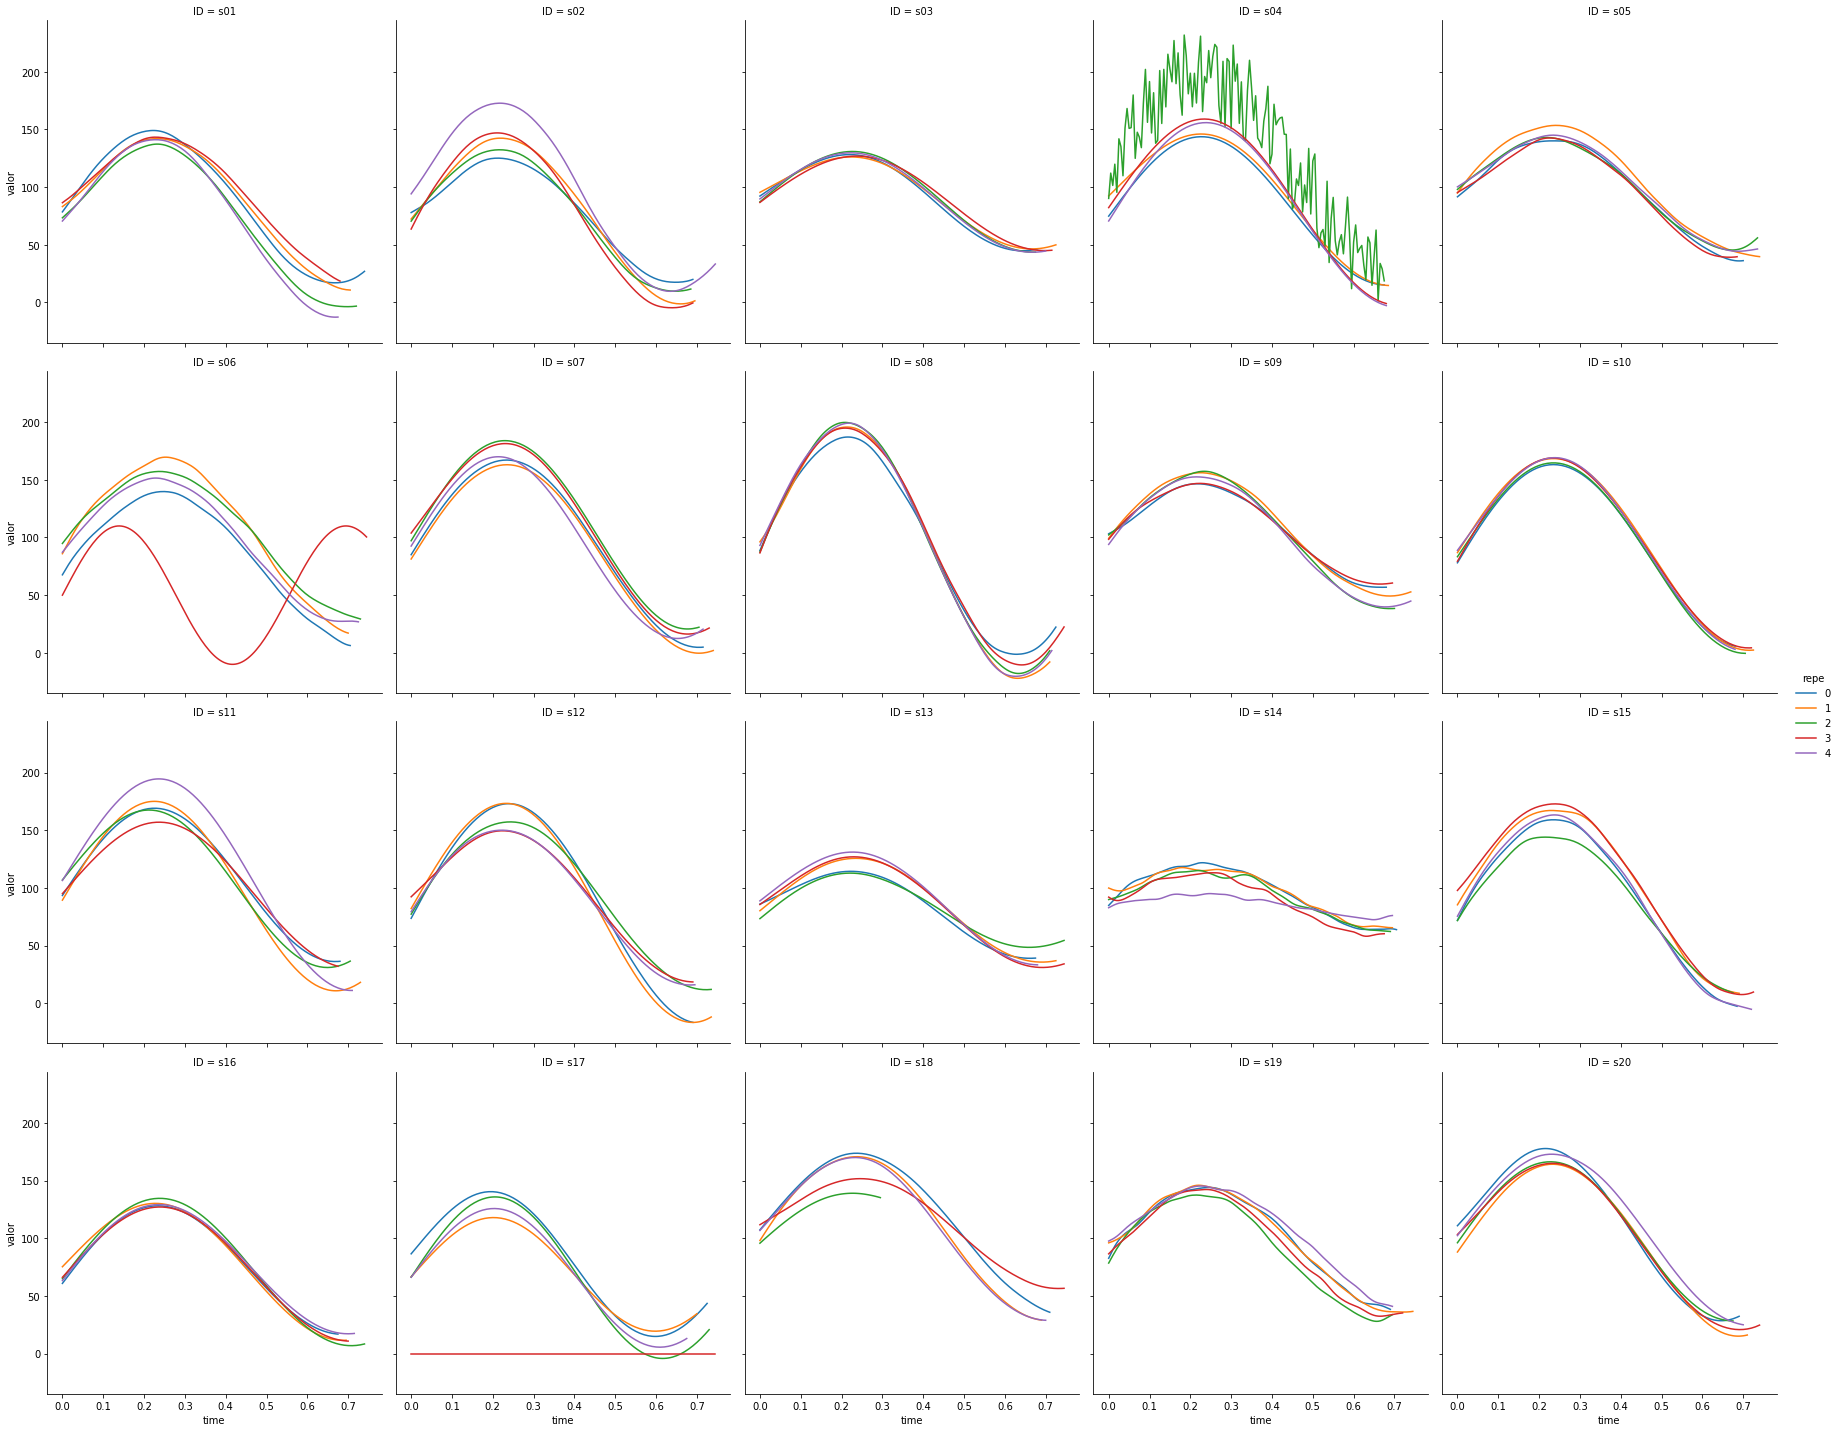

In [ ]:
sns.relplot(data=dfTodosArchivos, x='time', y='valor', col='ID', col_wrap=5, hue='repe', estimator=None, kind='line')#, palette=sns.color_palette('tab10',len(dfTodosSujetosLong['partID'].unique())))


Otra cosa interesante que podemos hacer fácilmente con *Seaborn* es crear lo que se llaman gráficas *ensemble average*, que consiste en mostrar la línea de la media instante a instante y en sombreado un estimador de límites de confianza. Por defecto aplica un cálculo de *bootstrap* que es más preciso que la desviación estándar, pero tarda mucho más en crear la figura. Con el parámetro *ci='sd'* calcula la desviación estandar instante a instante y tarda mucho menos en hacer el gráfico.

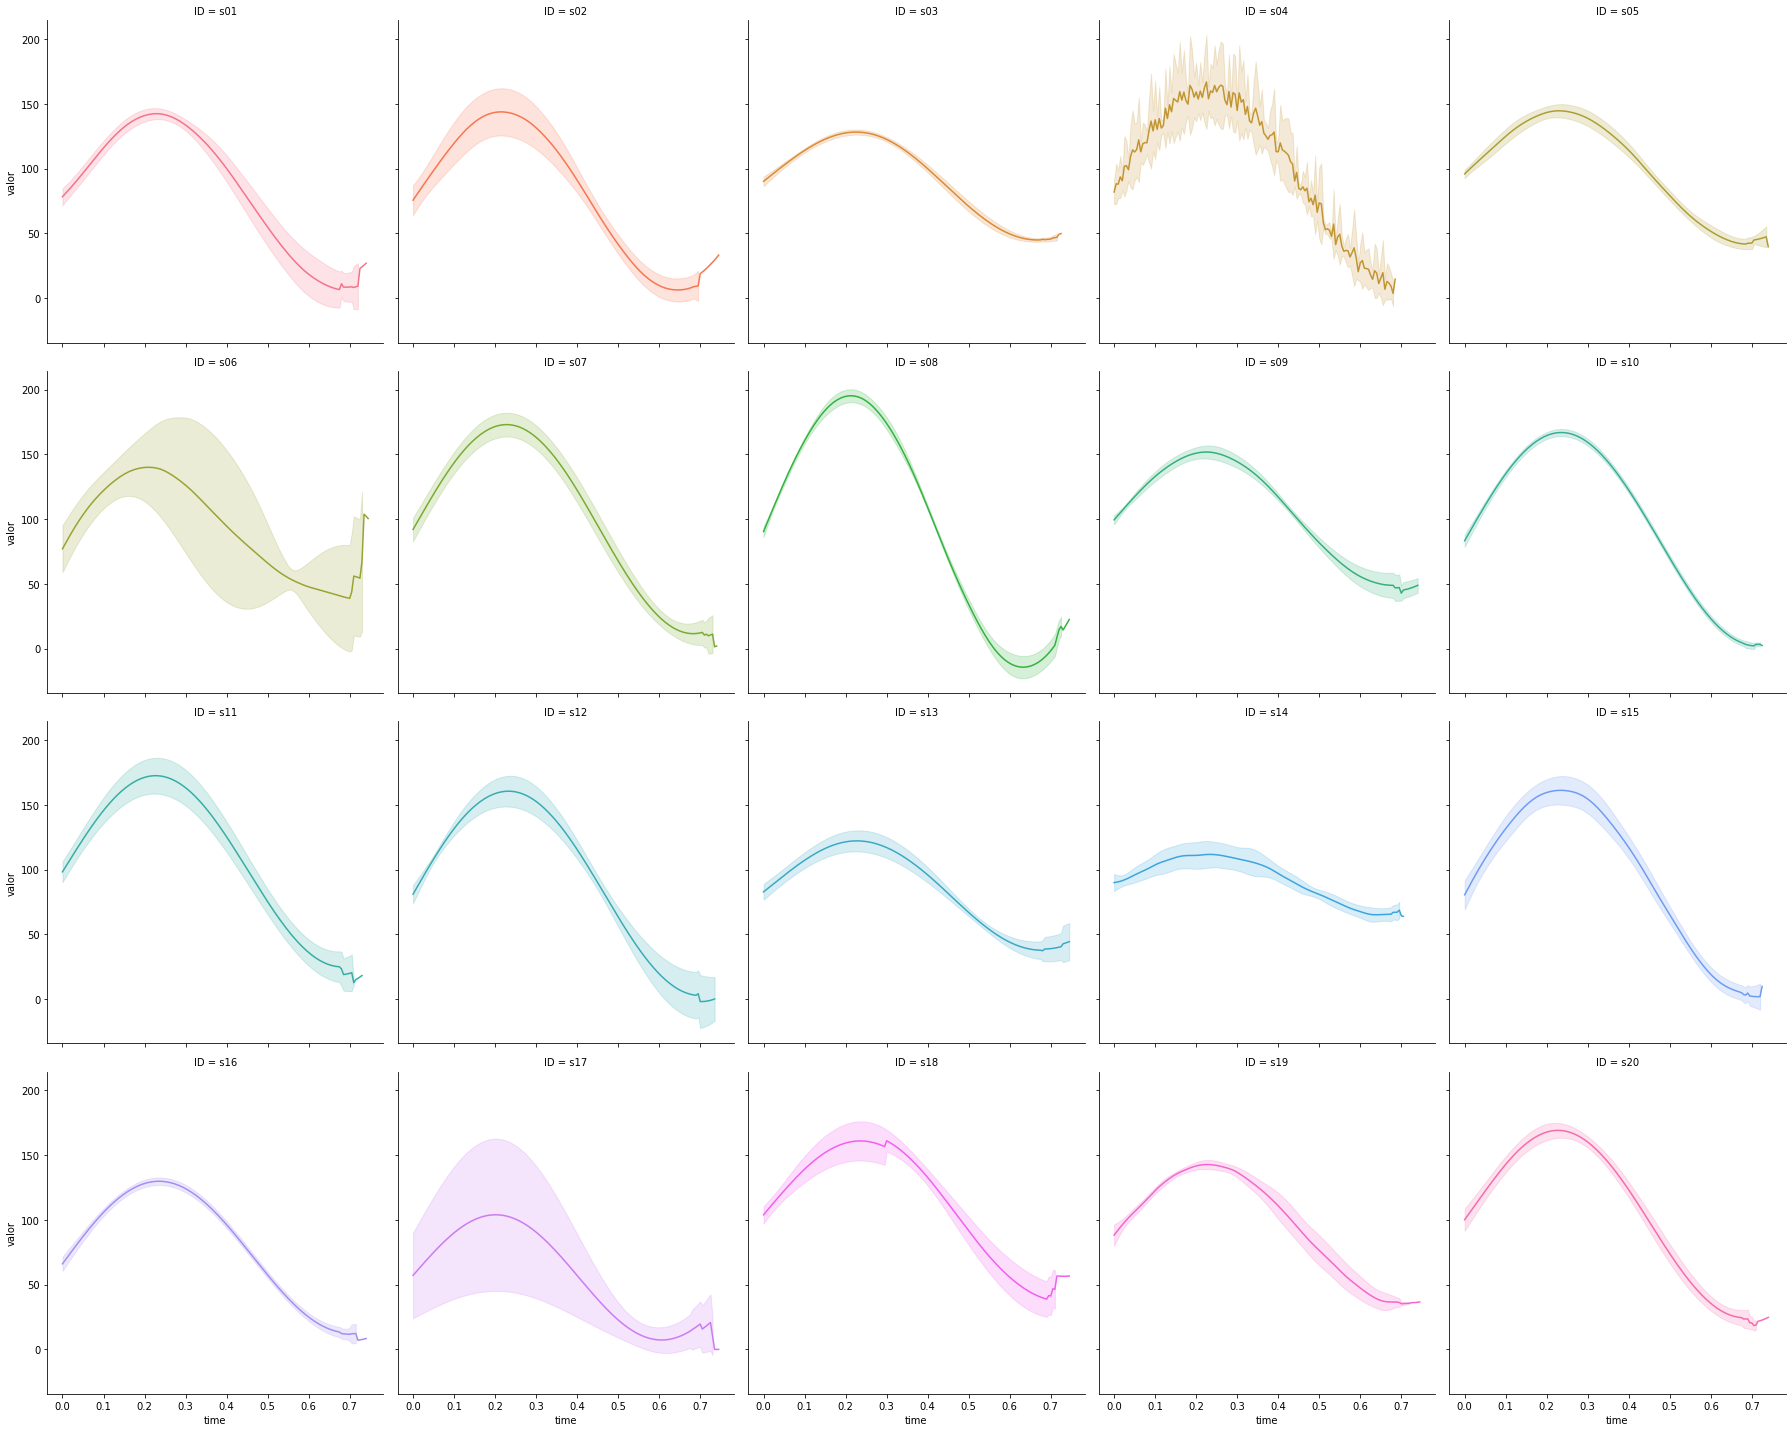

In [ ]:
sns.relplot(data=dfTodosArchivos, x='time', y='valor', col='ID', col_wrap=5, hue='ID', ci='sd', kind='line', legend=False)


O también podemos poerlos todos en las misma figura, aunque si hay muchos sujetos puede ser un poco caótica.

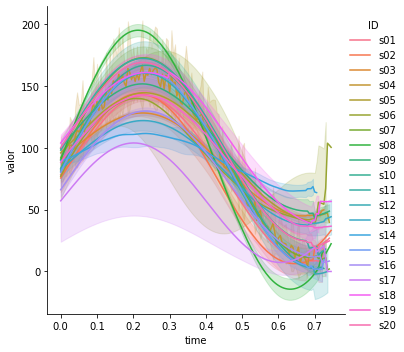

In [ ]:
sns.relplot(data=dfTodosArchivos, x='time', y='valor', hue='ID', ci='sd', kind='line')